# Ce Notebook a pour but de répondre au point suivant :

 - 2) Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.

L’appel à projets spécifie que l’analyse doit être simple à comprendre pour un public néophyte. Soyez donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.

 - 3) Confirmer ou infirmer les hypothèses  à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.
 
 
 




### En rapport avec l'application, nous allons analyser nos données pour construire un modèle de prédiction le plus fiable possible.

 - ##### Peut-on prédire un nutriscore avec nos données?

   1- Nous ferons une analyse univariée de nos indicateurs afin d'analyser leur distribution.
   
   2- Nous ferons ensuite une analyse bi-variée afin de rechercher les correlations entre nos indicateurs.
   
   3- Nous chercherons un modèle de prédiction qui sera le plus approprié à notre application.

In [1]:
#On commence par importer les librairies utiles à l'analyse

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_feather('data_monde_outlier_100.ft')
#del data['level_0']
del data['index']

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\pyarrow\pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [3]:
data.describe(include='all')

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition_grade_fr,product_name
count,727800.000000,722804.000000,693619.000000,144208.000000,144943.000000,722853.000000,709228.000000,295294.000000,725254.000000,704874.000000,704864.000000,138824.000000,142346.000000,145370.000000,142402.000000,255262.000000,255262,855574
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,599906
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d,Comté
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78723,633
mean,1139.314718,13.423230,5.216350,0.068582,0.024854,28.855968,14.493841,2.976184,8.118800,1.426903,0.585836,0.002264,0.024381,0.114011,0.006412,9.793843,NaN,NaN
std,804.867961,17.378024,7.908619,0.985320,0.644252,28.342753,20.446463,5.088761,9.415877,5.559972,2.472420,0.366247,0.837939,0.983131,0.315165,8.142899,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,427.000000,0.500000,0.100000,0.000000,0.000000,3.700000,0.800000,0.000000,1.100000,0.060000,0.020000,0.000000,0.000000,0.000000,0.000000,2.000000,NaN,NaN
50%,1096.000000,6.700000,1.900000,0.000000,0.000000,16.000000,4.200000,1.600000,5.600000,0.510000,0.200000,0.000000,0.000000,0.036000,0.001030,10.000000,NaN,NaN
75%,1674.000000,21.180000,7.500000,0.000000,0.020000,54.100000,21.000000,3.600000,11.580000,1.310000,0.520000,0.000107,0.003900,0.114000,0.002450,16.000000,NaN,NaN


# Création de fonctions

# Echantillonage des données

Pour optimiser le temps de conception du pairplot, nous travaillerons que sur 5000 produits.

In [4]:
data_sample = data.sample(n=5000)

# Utilisation du pair plot

Le pairplot nous permet de trouver une correlation entreplusieurs varibles.

Afficher le pairplot de nos données affinera notre selection de variables pour les études suivantes. 

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


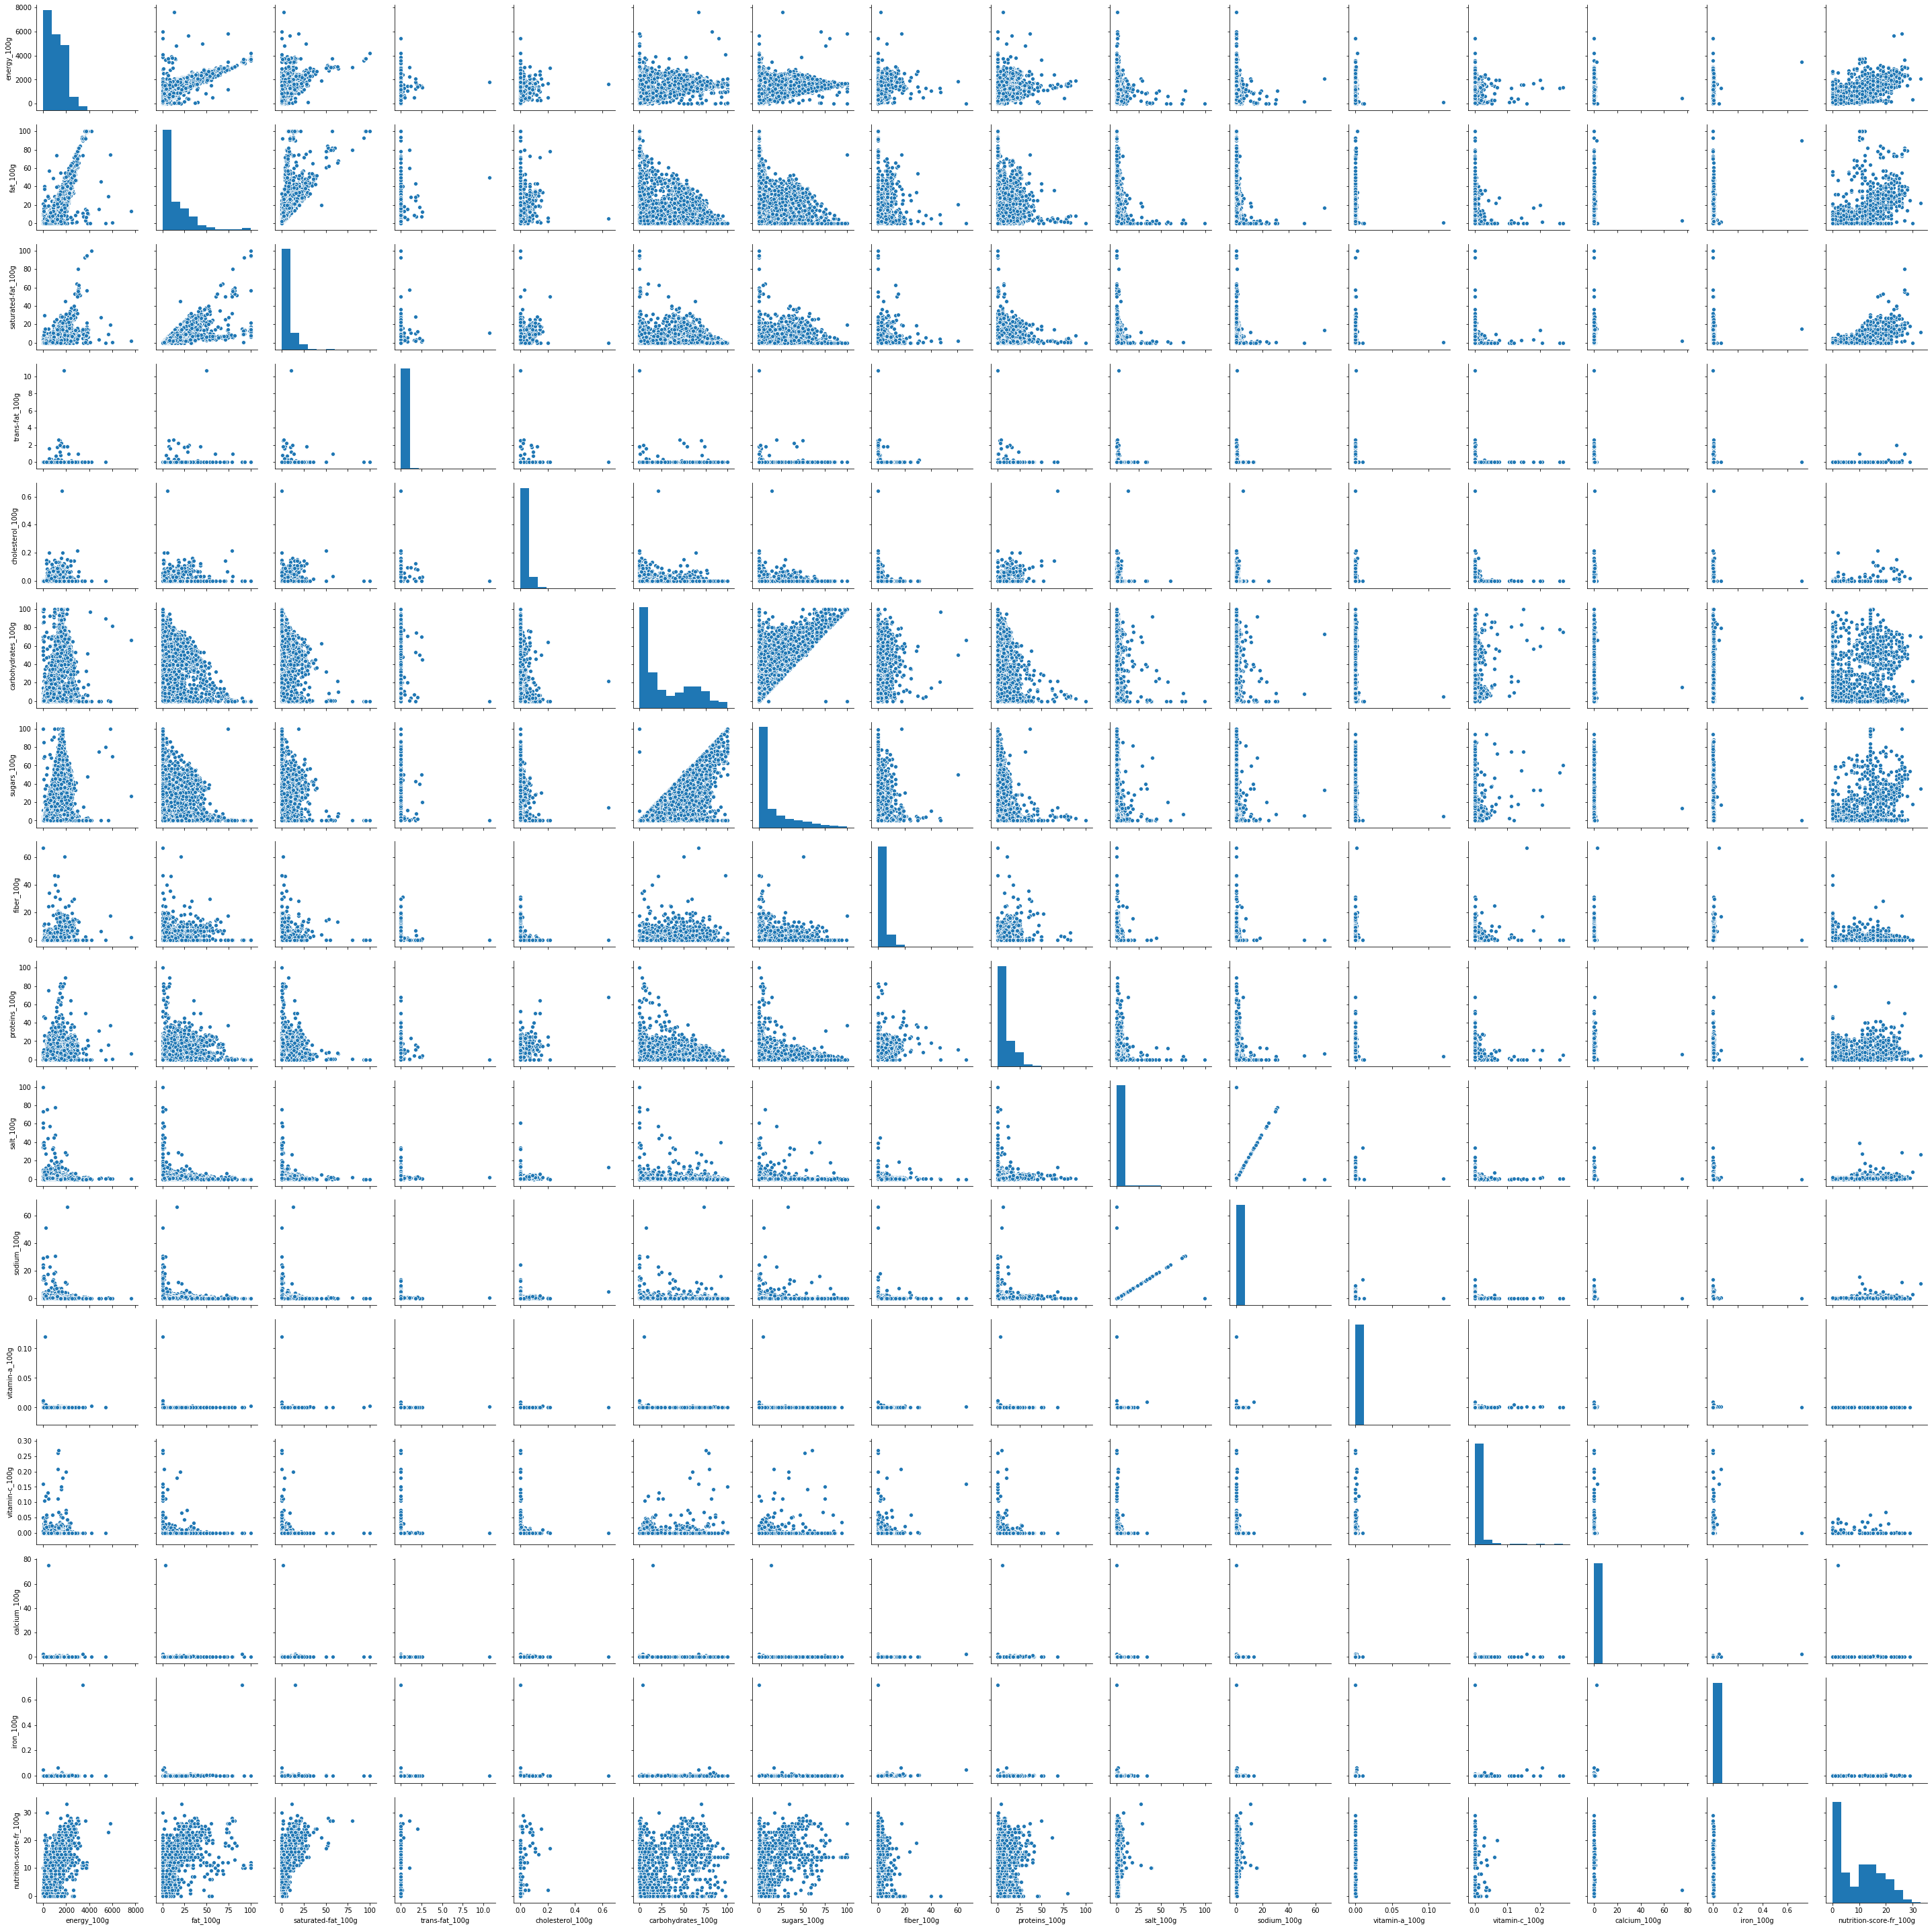

In [5]:
#On ne sélectionne que les colonnes de nutrition
#data_nutrition = data_sample.loc[:,data_sample.columns.str.contains('100g',case=False, na=False)]

sns.pairplot(data_sample, size=2.5)

# Interprétation du pairplot

 - Plus une représentation tend vers une droite, plus les deux variables composants le graphique sont des doublons pour nos analyses :
     - On peut constater que le sel et le sodium représente une droite parfaite. Cela veut dire que nous pouvons supprimer un des deux indicateurs.
     - On peut faire le même constat entre les gras et les gras saturés.
     
Notre application consiste à prédire le nutriscore d'un produit. Regardons quel indicateur est en adéquation avec le nutriscore :
 - On remarque que les gras et les gras saturés sont liés au nutriscore. Pourquoi? 
     - Moins il y a de gras, plus le nutriscore est faible.
 - Cependant, les féculents (carbonhydrates) ne sont pas du tout liés au nutriscore :
     - En effet, on remarque que le nuage de points est très dispersé. Pour un nutriscore faible, il peut y avoir autant de féculents qu'un nutriscore élevé.

Le pairplot est une première approche visuelle pour analyser la correlation entre les variables. D'autres méthodes mathématiques permettent d'affiner l'analyse de ces correlations, ce sera vu dans l'analyse bivariée des variables.

# Pairplot en fonction du classement nutritionnel

Ce pairplot nous permet d'analyser quel indicateur est correlé au grade nutritionnel, grace à un code couleur représentant chaque lettre de l'échelle.

##### On peut constater que le grade nutritionnel intimement lié au nutriscore.

Suppression des produits sans groupe nutritionnel identifié, afin de trier le pairplot par couleurs.
Il reste 1352 produits à analyser dans notre échantillon.



C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


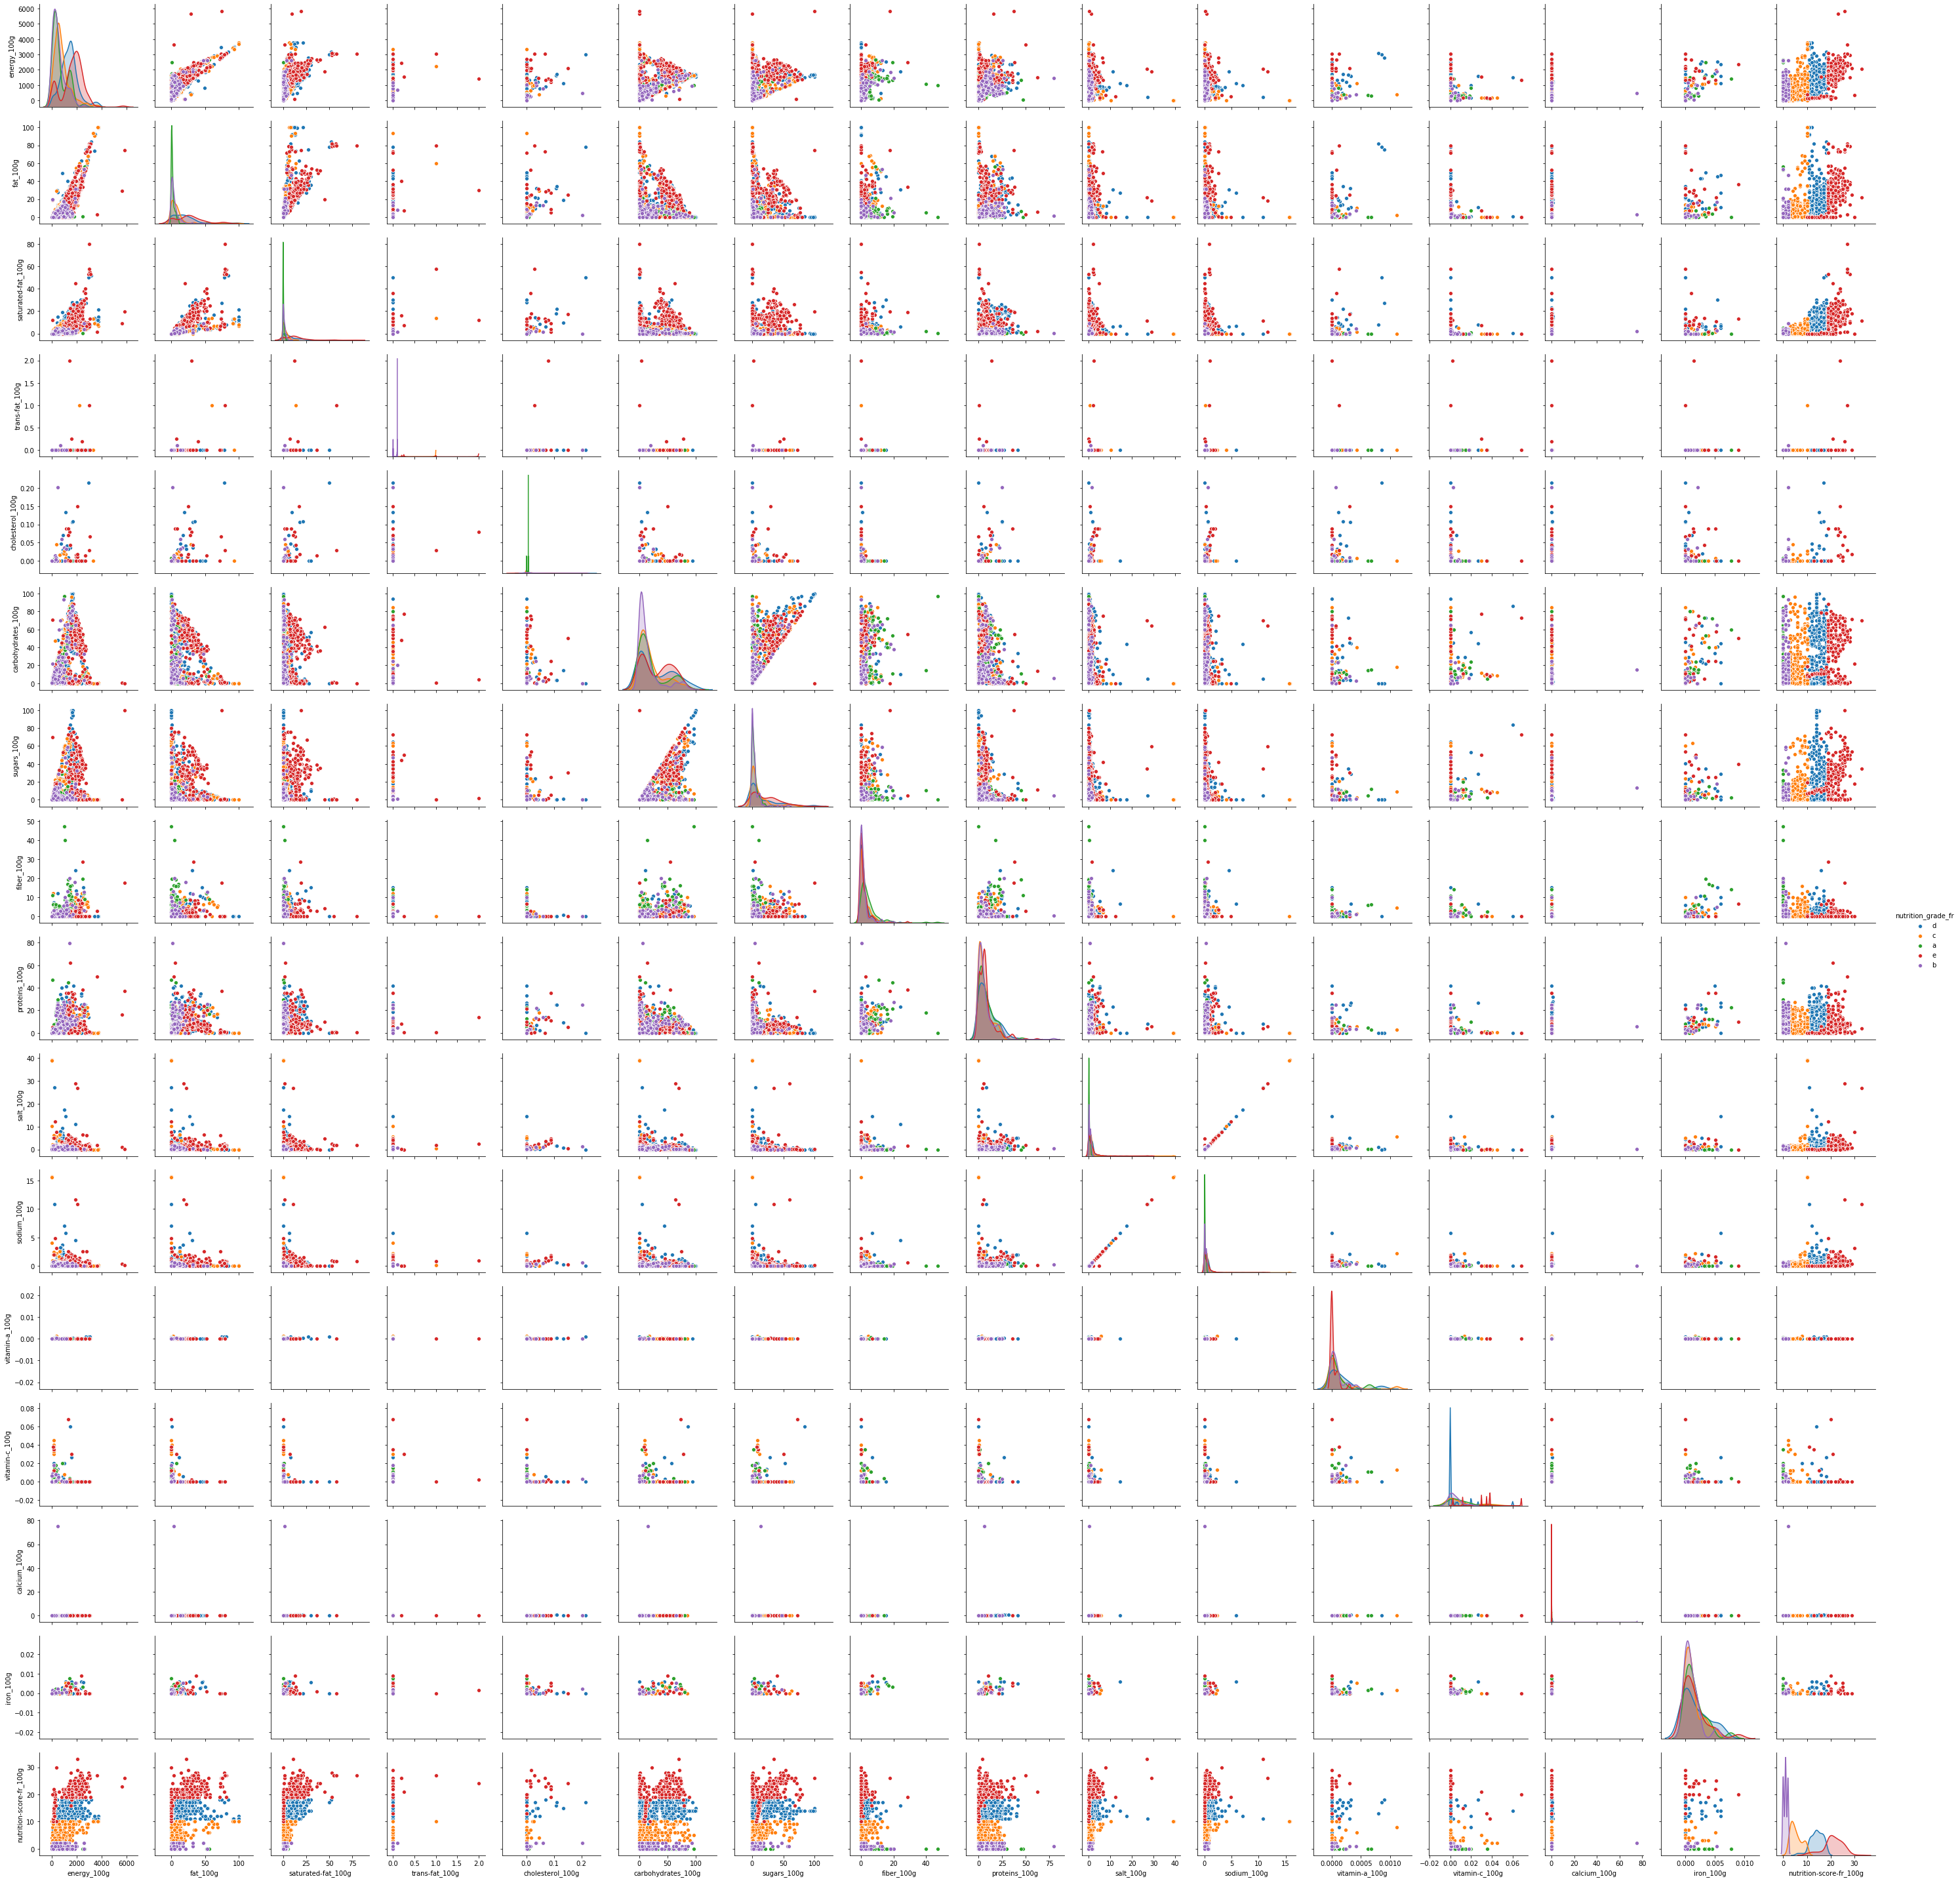

In [6]:
#Pour plus de clarté, nous allons identifier les données par couleur.
#La target des couleurs sera le groupe nutritionnel
#On repart de notre echantillon

data_sample_nettoye = data_sample

print("Suppression des produits sans groupe nutritionnel identifié, afin de trier le pairplot par couleurs.")

data_sample_nettoye.dropna(subset=['nutrition_grade_fr'],axis=0,inplace=True)

#data_sample_nettoye = pd.DataFrame(data_sample)
#data_sample_nettoye = data_sample.drop(data_sample[data_sample.iloc[:,'nutrition_grade_fr'].isnull()],axis=0,inplace=True)
#data_sample_nettoye
#data_sample_nettoye.loc[:,'nutrition_grade_fr'].dropna(axis=0, inplace = True)
print("Il reste {} produits à analyser dans notre échantillon.".format(data_sample_nettoye.shape[0]))
print('')

sns.pairplot(data_sample_nettoye, hue='nutrition_grade_fr', size=2.5);

# Analyse univariée

Dans cette partie, nous allons analyser la distribution de chaque indicateur. Le but est de trouver un indicateur ayant une distribution normale (Gaussienne), centrée sur une valeur, afin de pouvoir appliquer une regression linéaire par la suite.

Pour cela, nous utliserons un histogramme pour identifier la forme de la distribution, ainsi qu'un boxplot pour analyser les dispersions. Et ce, pour chaque indicateur.

#### Comme vu précédement nous allons procéder à la suppression de l'indicateur sodium, vu qu'il est en doublon avec le sel. (Nous aurions pu faire l'inverse).

In [7]:
data_analyse = data.iloc[:,:-1]
data_analyse.shape

(928555, 17)

In [8]:
data_analyse.drop("sodium_100g",axis=1,inplace = True)
#data_analyse.drop("vitamin-a_100g",axis=1,inplace = True)
#data_analyse.drop("vitamin-c_100g",axis=1,inplace = True)
#data_analyse.drop("calcium_100g",axis=1,inplace = True)
#data_analyse.drop("iron_100g",axis=1,inplace = True)
#data_analyse.drop("trans-fat_100g",axis=1,inplace = True)
#data_analyse.drop("cholesterol_100g",axis=1,inplace = True)
#data_analyse.drop("fat_100g",axis=1,inplace = True)
data_analyse.shape

(928555, 16)

#### Analyse de chaque indicateur

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: Method .as_matrix will be removed in a

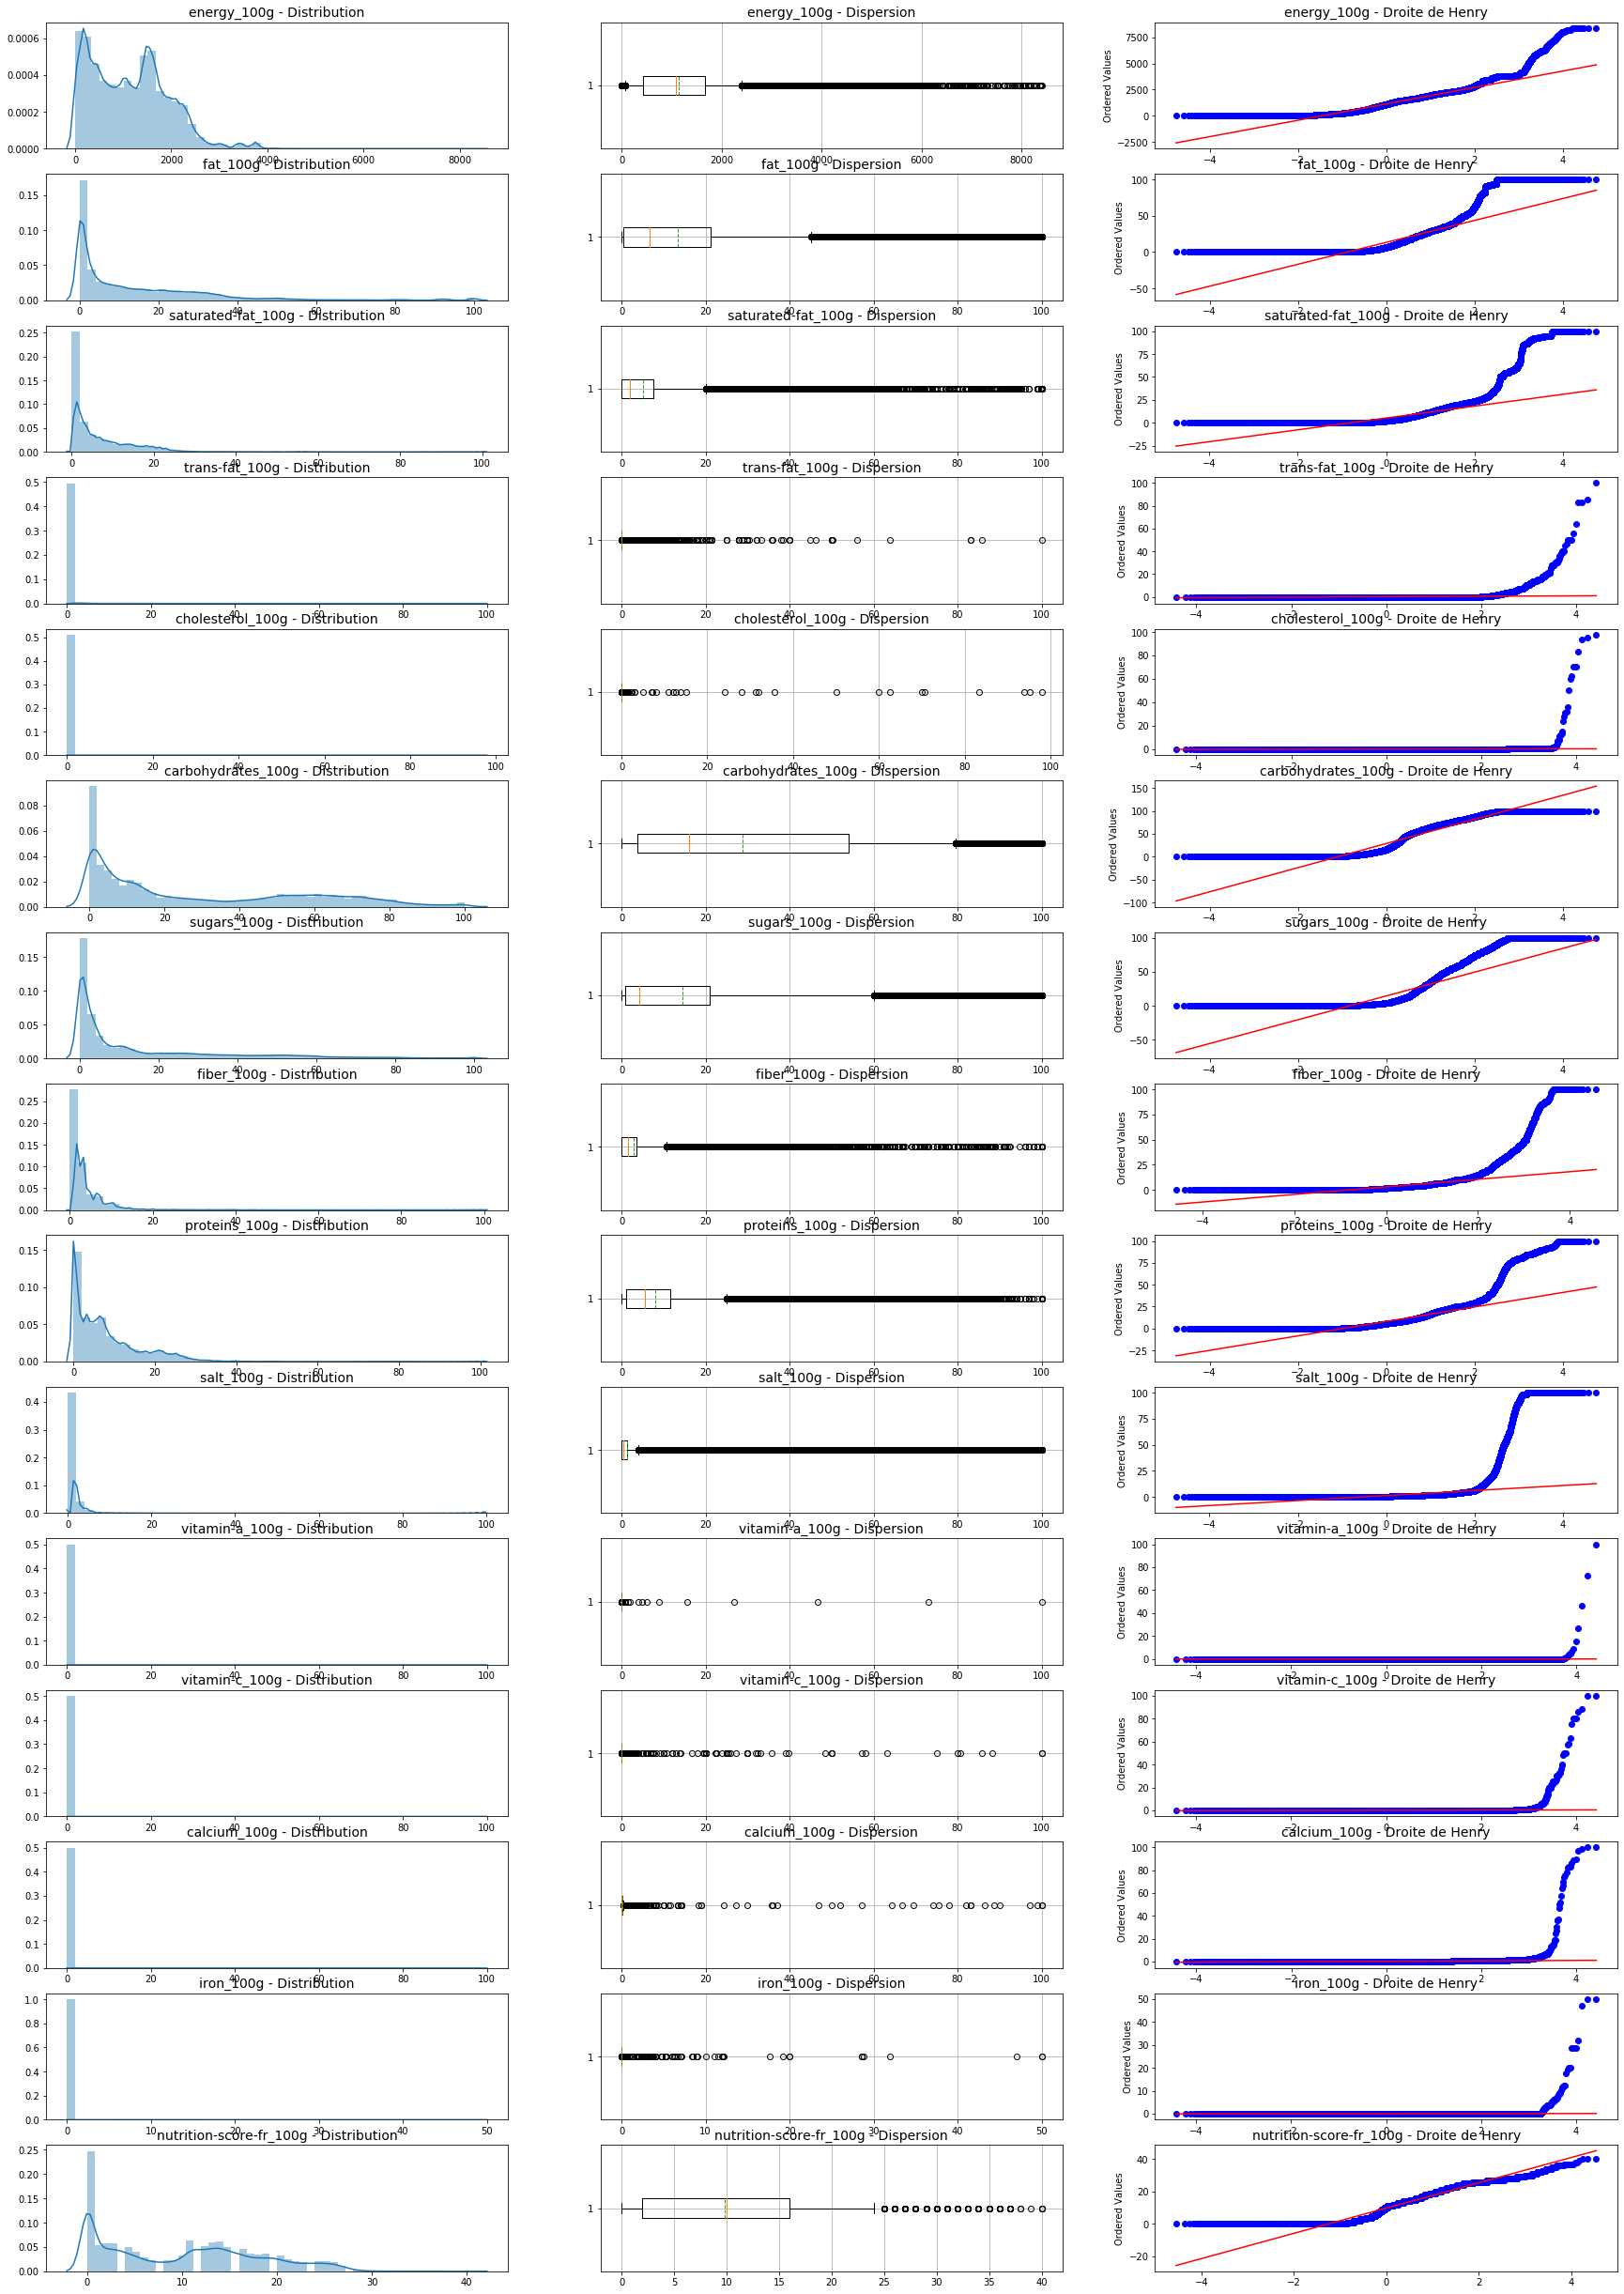

<Figure size 432x288 with 0 Axes>

In [9]:
#Cette fonction boucle sur les colonnes de chaque indicateur
#Ce qui représente 16 graphiques

import scipy.stats as stats

nbr_lignes = 17
nbr_colonnes = 3
num_graph = 1

plt.subplots(figsize=(30, 50))

for i in data_analyse:
    
    #On code une condition pour ne traiter que les indicateurs désirés
    if num_graph <= nbr_lignes * nbr_colonnes:

        mydata = data_analyse[i]
        mydata.dropna(axis=0, inplace=True)

        plt.subplot(nbr_lignes,nbr_colonnes, num_graph)
        sns.distplot(mydata, kde=True)
        plt.title(i + " - Distribution",size=14)
        plt.xlabel('')

        num_graph +=1

        plt.subplot(nbr_lignes,nbr_colonnes, num_graph)
        plt.boxplot(mydata,whis=[5,95], meanline=True, showmeans=True, vert=False)
        plt.grid()
        plt.title(i + " - Dispersion",size=14)

        num_graph +=1
        
        plt.subplot(nbr_lignes,nbr_colonnes, num_graph)
        
        measurements = mydata.as_matrix()
        stats.probplot(measurements, dist="norm", plot=plt)
        plt.title(i + " - Droite de Henry",size=14)
        plt.xlabel('')
        
        num_graph +=1

        if i == "nutrition-score-fr_100g":
            break
            
plt.show()
plt.savefig('Analyse univariée.png')

#### Le mode et le Skewness empirique

In [10]:
for i in data_analyse:
    
    #On calcule le mode
    print("Le mode de l'indicateur {} est {}.".format(i, data_sample[i].mode().shape[0]))
    #On calcule le Skewness empirique
    print("Le Skewness empirique de l'indicateur {} est {}.".format(i, round(data_sample[i].skew(),2)))
    print('')
    
    #On code une condition pour ne traiter que les indicateurs désirés
    if i == "nutrition-score-fr_100g":
        break

Le mode de l'indicateur energy_100g est 1.
Le Skewness empirique de l'indicateur energy_100g est 0.86.

Le mode de l'indicateur fat_100g est 1.
Le Skewness empirique de l'indicateur fat_100g est 2.07.

Le mode de l'indicateur saturated-fat_100g est 1.
Le Skewness empirique de l'indicateur saturated-fat_100g est 2.9.

Le mode de l'indicateur trans-fat_100g est 1.
Le Skewness empirique de l'indicateur trans-fat_100g est 6.88.

Le mode de l'indicateur cholesterol_100g est 1.
Le Skewness empirique de l'indicateur cholesterol_100g est 2.89.

Le mode de l'indicateur carbohydrates_100g est 1.
Le Skewness empirique de l'indicateur carbohydrates_100g est 0.87.

Le mode de l'indicateur sugars_100g est 1.
Le Skewness empirique de l'indicateur sugars_100g est 2.02.

Le mode de l'indicateur fiber_100g est 1.
Le Skewness empirique de l'indicateur fiber_100g est 4.29.

Le mode de l'indicateur proteins_100g est 1.
Le Skewness empirique de l'indicateur proteins_100g est 1.89.

Le mode de l'indicateur s

# Conclusion

### - Analyse de la distribution :
 - La droite de Henry permet de vérifier visuellement qu'une distribution est normale. Le principe est simple. Si les points suivent la droite, alors la distribution est Gaussienne. Dans notre cas, nous pouvons constater que les distributions ne sont pas Gaussienne.

### - Analyse de la dispersion :
 - Les distributions sont très asymétriques à gauche, comme peuvent nous le montrer les boites à moustache.
 - Les modes sont = 1.
 - Le Skewness empirique (permet d'analyser la symétrie dune distribution. Si = 0, alors la distribution est symétrique. >0, distribution asymétrique à gauche et <0, distribution asymétrique à droite.) conforte notre analyse.

# Analyse bi-variée

Nous allons commencer par tracer la matrice de correlation de notre échantillon.

Cette matrice nous donnera un aperçu de la corrélation linéaire entre nos variables.

Pour renforcer l'interprétation de la matrice nous allons afficher la valeurs des coefficients de corrélation linéaire.

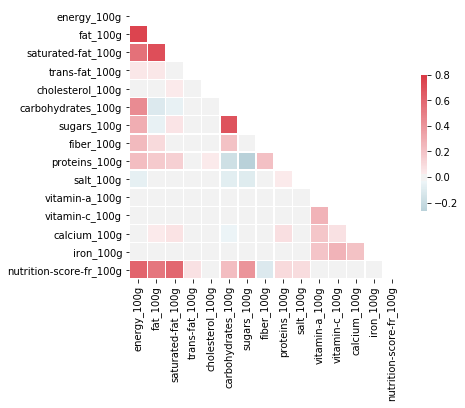

In [11]:
# Set up the matplotlib figure

corr = data_analyse.corr(method='pearson')

plt.subplots(figsize=(7, 5))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Affichons maintenant les valeurs des coefficients linéaires.

In [12]:
#On calcule les coefficients de corrélation de notre échantillon
corr = data_analyse.corr(method='pearson')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

corr.style.format("{:.2}").background_gradient(cmap=cmap)

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
energy_100g,1.0,0.75,0.56,0.045,0.0053,0.44,0.3,0.24,0.23,-0.063,-0.007,-0.015,0.018,0.0032,0.61
fat_100g,0.75,1.0,0.71,0.046,0.015,-0.11,-0.06,0.1,0.17,-0.026,-0.0026,-0.02,0.034,-0.0051,0.54
saturated-fat_100g,0.56,0.71,1.0,0.024,0.03,-0.055,0.06,0.00072,0.15,-0.014,-0.0021,-0.014,0.064,-0.0057,0.6
trans-fat_100g,0.045,0.046,0.024,1.0,0.0017,0.014,0.011,-0.00024,-0.013,0.0025,-0.00024,-0.0025,-0.002,0.0039,0.069
cholesterol_100g,0.0053,0.015,0.03,0.0017,1.0,-0.024,-0.012,-0.016,0.035,0.0014,-0.00011,-0.0025,0.017,-0.00019,0.022
carbohydrates_100g,0.44,-0.11,-0.055,0.014,-0.024,1.0,0.69,0.21,-0.17,-0.08,0.0011,-0.0027,-0.037,0.012,0.23
sugars_100g,0.3,-0.06,0.06,0.011,-0.012,0.69,1.0,-0.012,-0.27,-0.091,-0.0015,0.00028,-0.023,0.0023,0.41
fiber_100g,0.24,0.1,0.00072,-0.00024,-0.016,0.21,-0.012,1.0,0.22,-0.0069,-0.0017,0.011,0.0047,0.013,-0.11
proteins_100g,0.23,0.17,0.15,-0.013,0.035,-0.17,-0.27,0.22,1.0,0.03,-0.0014,-0.0099,0.085,0.0076,0.1
salt_100g,-0.063,-0.026,-0.014,0.0025,0.0014,-0.08,-0.091,-0.0069,0.03,1.0,8.6e-05,0.013,0.016,0.0042,0.097


# Analyse de la corrélation

Rappel coefficient linéaire : C'est un coefficient compris entre -1 et 1. Plus la valeur est proche de 1 ou -1, plus la corrélation est vraie et la relation est linéaire. Si la valeur est proche de 0, il n'y a pas de corrélation linéaire entre les deux variables. Un modèle de prédiction linéaire n'est donc pas adapté pour faire de la prédiction.

Cependant il existe d'autres méthodes pour analyser la corrélation. Nous allons approfondir cette analyse avec deux autres méthodes.

#### La méthode ANOVA
Une analyse de la covariance entre deux variables (quantitative et qualitative)

Ici, la question que l'on se pose est :
 - Est-ce que les valeurs de nos indicateurs varient en fonction du grade nutritionnel?
 
Notre variable qualitative ici sera le grade nutritionnel (de A à E).

Nous ferons l'analyse pour chaque indicateur. Nos variables quantitatives seront donc nos indicateurs.

In [13]:
#On commence donc par définir nos variables

X = "nutrition_grade_fr" # qualitative

#sous_echantillon = data_sample.iloc[:,:-1] 

Y = data_analyse.columns # quantitative

#On tri le dataframe par grade nutritionnel
sous_echantillon = data_analyse.sort_values(by=X)
sous_echantillon.dropna(axis=0, inplace=True, how="any")
sous_echantillon.head()

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition_grade_fr
258554,343.0,0.00,0.0,0.0,0.0,11.76,10.59,0.0,8.24,0.10414,0.000000,0.0000,0.088,0.00000,0.0,a
261128,276.0,0.00,0.0,0.0,0.0,15.57,14.75,0.0,0.00,0.02032,0.000000,0.0172,0.000,0.00030,0.0,a
261005,331.0,0.00,0.0,0.0,0.0,18.90,18.11,0.8,0.00,0.02032,0.000024,0.0009,0.000,0.00000,0.0,a
272872,226.0,0.00,0.0,0.0,0.0,10.00,0.77,5.4,2.31,0.80010,0.000000,0.0069,0.031,0.00138,0.0,a
278369,209.0,0.71,0.0,0.0,0.0,12.14,8.57,2.9,0.71,0.00000,0.000000,0.0026,0.000,0.00000,0.0,a


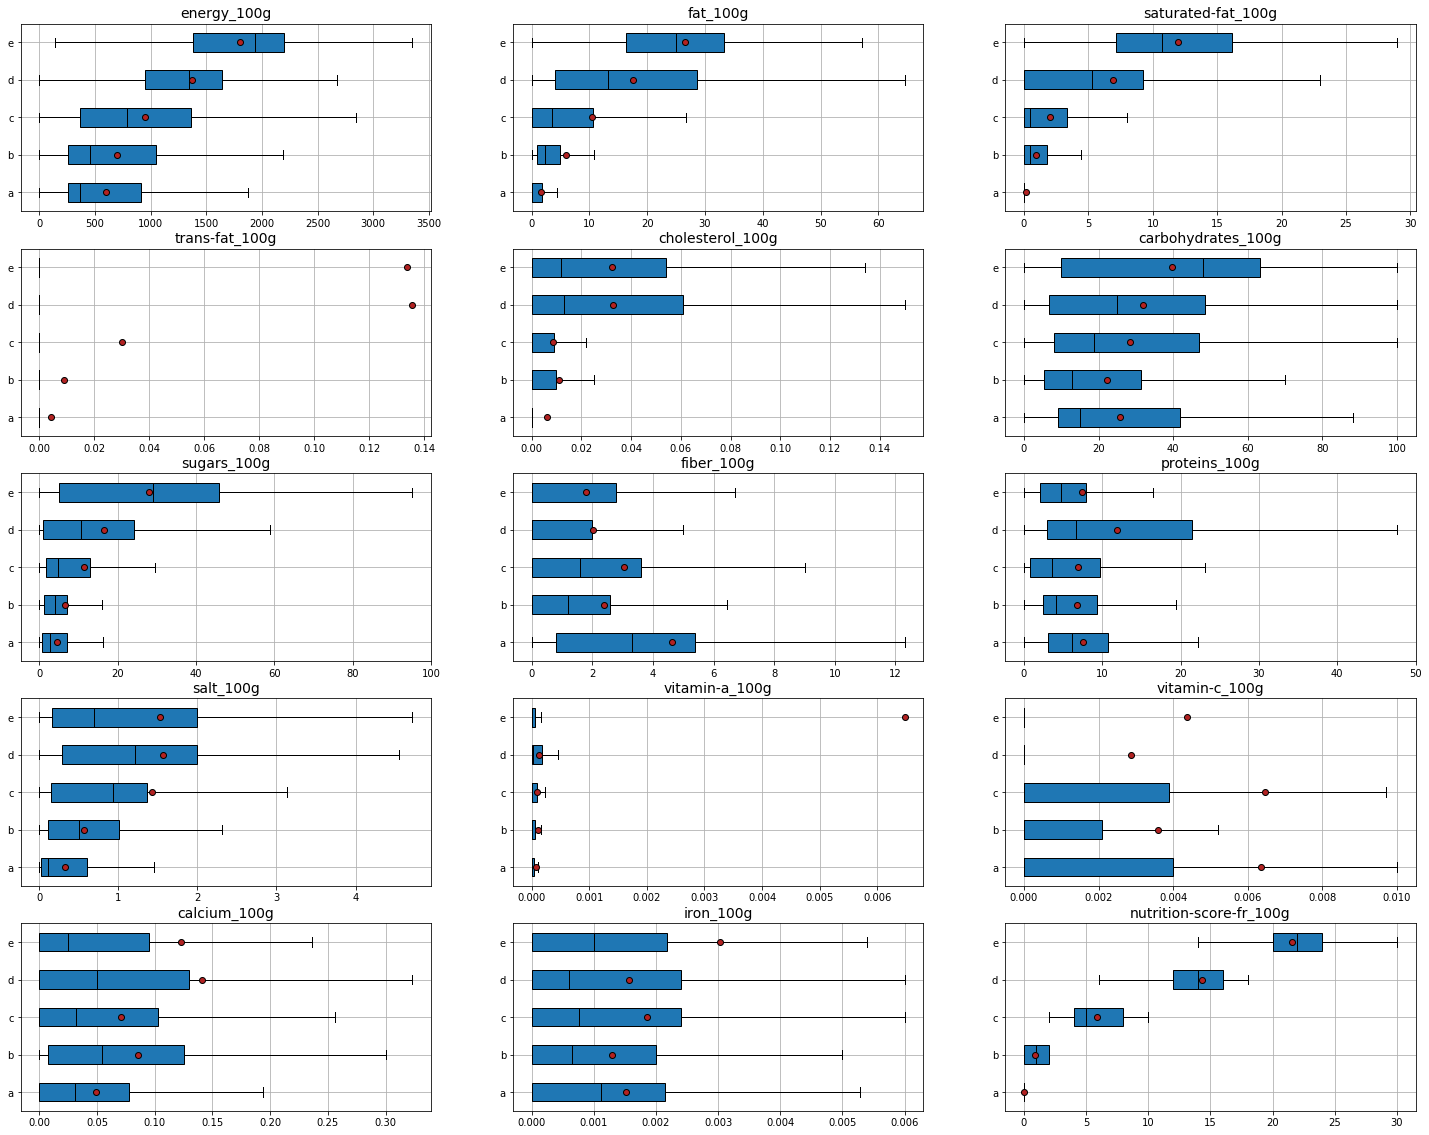

In [14]:
#On analyse donc l'ANOVA pour chaque indicateur
#Pour cela on utilise des boites à moustache

nbr_lignes = 5
nbr_colonnes = 3
num_graph = 1

plt.subplots(figsize=(25, 20))

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

#Cette boucle for trace une boite à moustache pour chaque indicateur analysé
for i in sous_echantillon:
    
    if num_graph <= nbr_lignes * nbr_colonnes:

        grouper = sous_echantillon.groupby(X)[i]
        x = [grouper.get_group(k) for k in grouper.groups]
        
        plt.subplot(nbr_lignes,nbr_colonnes, num_graph)
        
        plt.boxplot(x, labels=sous_echantillon[X].unique(), showfliers=False, medianprops=medianprops, 
                    vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
        plt.grid()
        
        plt.title(i,size=14)
        
        num_graph +=1
        
    if i == "nutrition-score-fr_100g":
        break
        
plt.show()


##### Analyse de l'ANOVA

Nous constatons facilement que 4 indicateurs sont corrélés par rapport au grade nutritionnel, car plus le grade est mauvais plus leur valeur augmente :
 - L'énergie nutritionnelle
 - Les gras saturés
 - Les sucres
 - Les fibres
 
Logiquement, le grade dépend du score nutritionnel.

Nous constatons que le grade ne dépend pas des protéines et du sel.


# Construction des modèles

Avant toute chose nous allons spliter notre dataset général en 3 parties :

 - Un premier split pour créer un set de validation. Ces données ne seront pas utilisées jusqu'à la validation d'un modèle. Nous prendrons 15% du dataset général.
 
A partir des 85% restant, nous ferons un deuxième split :
 - Une partie pour l'entrainement du modèle (20%)
 - Une partie pour le test du modèle (80%

#### Sélection des indicateurs

In [15]:
#On commence par construire notre tableau de données

#Test 1
indicateurs = ["energy_100g","fat_100g","saturated-fat_100g","sugars_100g","fiber_100g","nutrition-score-fr_100g"]
#Test 2
#indicateurs = ["energy_100g","fat_100g","saturated-fat_100g","sugars_100g","nutrition-score-fr_100g"]
#Test 3
#indicateurs = ["energy_100g","saturated-fat_100g","sugars_100g","nutrition-score-fr_100g"]
#Test 4
#indicateurs = ["energy_100g","saturated-fat_100g","sugars_100g","fiber_100g","nutrition-score-fr_100g"]
#Test 5
#indicateurs = ["energy_100g","fat_100g","sugars_100g","fiber_100g","nutrition-score-fr_100g"]
#Test 6
#indicateurs = ["energy_100g","fat_100g","saturated-fat_100g","sugars_100g","carbohydrates_100g","fiber_100g","nutrition-score-fr_100g"]


#data_sample_nettoye = data.loc[:,data.columns.str.contains('100g',case=False, na=False)]
data_predict = data_analyse.loc[:,indicateurs]
#data_sample_nettoye.drop(["fat_100g","fiber_100g"],axis=1,inplace = True)
data_predict.dropna(axis=0, inplace=True, how='any')
data_predict.describe()

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,nutrition-score-fr_100g
count,116703.000000,116703.000000,116703.000000,116703.000000,116703.000000,116703.000000
mean,1099.808862,12.635690,4.532878,12.472576,2.807250,8.114907
std,812.083734,17.498601,7.729406,17.580001,4.717987,7.809960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,371.000000,0.770000,0.100000,1.000000,0.000000,0.000000
50%,1008.000000,5.300000,1.300000,4.200000,1.500000,6.000000
75%,1644.000000,18.800000,5.800000,16.200000,3.500000,14.000000
max,8190.000000,100.000000,100.000000,100.000000,100.000000,40.000000


#### Création du set de validation

In [16]:
from sklearn.model_selection import train_test_split

train_set, validation_set = train_test_split(data_predict, test_size = 0.15, random_state=5)

print("Il y a {} données dans le set de validation.".format(validation_set.shape))
print("Il y a {} données dans le set qui entrainera le modèle.".format(train_set.shape))

Il y a (17506, 6) données dans le set de validation.
Il y a (99197, 6) données dans le set qui entrainera le modèle.


#### Split du set d'entraînement

In [17]:
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split

Y = train_set["nutrition-score-fr_100g"]
X = train_set
X.drop("nutrition-score-fr_100g", axis=1, inplace = True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(79357, 5)
(79357,)
(19840, 5)
(19840,)


C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##### Après mentorat du 22/08/2019, essai de la validation croisée en n'utilisant pas le validation_set afin de comparer les résultats

In [18]:
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split

Y = data_predict["nutrition-score-fr_100g"]
X = data_predict
X.drop("nutrition-score-fr_100g", axis=1, inplace = True)

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size = 0.2, random_state=5)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(79357, 5)
(79357,)
(19840, 5)
(19840,)


#### 1- Modèle de régression linéaire

In [19]:
#On construit le modèle de régression linéaire
#entrainement du modèle

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 5.031124885903413
Cela veut dire que pour une prédiction, notre modèle se trompera de 5.03 sur le Nutriscore.
Le score R2 est 0.5851652897215107


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 5.062458262106592
Cela veut dire que pour une prédiction, notre modèle se trompera de 5.06 sur le Nutriscore.
Le score R2 est 0.5826161945776103


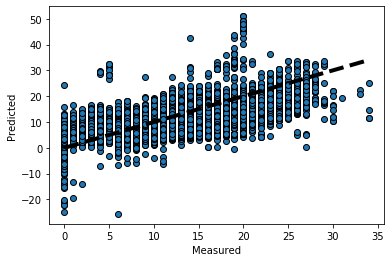

In [20]:
# Evaluation du training set

from sklearn.metrics import r2_score

y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(rmse))
print("Cela veut dire que pour une prédiction, notre modèle se trompera de",round(rmse,2),"sur le Nutriscore.")
print('Le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(rmse))
print("Cela veut dire que pour une prédiction, notre modèle se trompera de",round(rmse,2),"sur le Nutriscore.")
print('Le score R2 est {}'.format(r2))

# Plot outputs
fig, ax = plt.subplots()
ax.scatter(Y_test, y_test_predict, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### La méthode du chi2

En appliquant le test du chi2 sur les résidus de notre régression linéaire, nous cherchons à tester la normalité de la distribution des résultats.

PLus simplement, on cherche à savoir si les résultats sont concentrés autour d'une valeur.

Pour la méthode du khi2, nous considererons l'hypothèse nulle suivante :
 - H0 = Ma distribution est normale
 - H1 = Ma distribution n'est pas normale

Si la P_value est < 5%, alors nous pourrons dire que nous rejetons H0 et que nous acceptons H1.

In [21]:
from scipy import stats

# Constructing the Contingency Table
f_obs = pd.crosstab(Y_test[:10], y_test_predict[:10],margins=True)

# The Chi-Squared test for independence
g, p, dof, expctd = stats.chi2_contingency(f_obs)

print("La valeur du chi2 est de", g)
print("La p_value est de :", p, ". Soit ", round(p*100,2), "%.")
print("Le nombre de degrés de liberté est de :", dof)
print('')

if round(p*100,2) <= 5:
    print("La distribution des résidus n'est pas normale.")
else:
    print("La distribution des résidus est normale.")

La valeur du chi2 est de 40.0
La p_value est de : 0.8432273781737623 . Soit  84.32 %.
Le nombre de degrés de liberté est de : 50

La distribution des résidus est normale.


### Essai de notre modèle de prédiction

##### Description de l'essai :
Nous allons prédire les produits de notre set de validation, et comparer les prédictions avec leur équivalent inscrits dans la base.

Nous afficherons les résultats sur un graphique en forme de courbe afin de visualiser leur distribution.

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [1097, 5472, 5237, 2527, 1564, 874, 432, 211, 42, 9, 5, 36]]


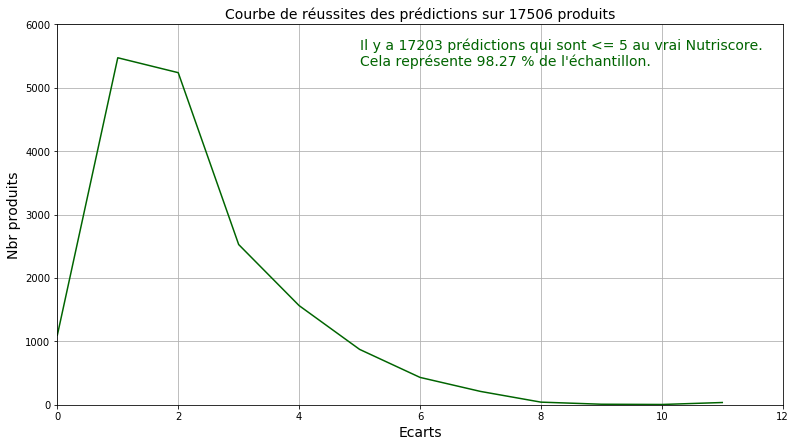

In [22]:
some_data = validation_set.iloc[:]
some_labels = validation_set["nutrition-score-fr_100g"].iloc[:]
some_data.drop("nutrition-score-fr_100g", axis=1, inplace = True)

predictions = lmodellineaire.predict(some_data)
predictions = map(int,predictions)
etiquettes = list(some_labels)

#print("Prédictions:",predictions)
#print("Etiquettes:",etiquettes)

[juste,ec1,ec2,ec3,ec4,ec5,ec6,ec7,ec8,ec9,ec10,ec11] = [0 for i in range(12)]

for i in enumerate(predictions):

    if (i[1] == etiquettes[i[0]]):
        juste +=1
    elif (i[1] >= (etiquettes[i[0]] - 2)) and (i[1] <= (etiquettes[i[0]] + 2)):
        ec1 +=1
    elif (i[1] >= (etiquettes[i[0]] - 4)) and (i[1] <= (etiquettes[i[0]] + 4)):
        ec2 +=1
    elif (i[1] >= (etiquettes[i[0]] - 6)) and (i[1] <= (etiquettes[i[0]] + 6)):
        ec3 +=1
    elif (i[1] >= (etiquettes[i[0]] - 8)) and (i[1] <= (etiquettes[i[0]] + 8)):
        ec4 +=1
    elif (i[1] >= (etiquettes[i[0]] - 10)) and (i[1] <= (etiquettes[i[0]] + 10)):
        ec5 +=1
    elif (i[1] >= (etiquettes[i[0]] - 12)) and (i[1] <= (etiquettes[i[0]] + 12)):
        ec6 +=1
    elif (i[1] >= (etiquettes[i[0]] - 14)) and (i[1] <= (etiquettes[i[0]] + 14)):
        ec7 +=1
    elif (i[1] >= (etiquettes[i[0]] - 16)) and (i[1] <= (etiquettes[i[0]] + 16)):
        ec8 +=1
    elif (i[1] >= (etiquettes[i[0]] - 18)) and (i[1] <= (etiquettes[i[0]] + 18)):
        ec9 +=1
    elif (i[1] >= (etiquettes[i[0]] - 20)) and (i[1] <= (etiquettes[i[0]] + 20)):
        ec10 +=1
    else:
        ec11 +=1
        
donnees = list([[0,1,2,3,4,5,6,7,8,9,10,11],[juste,ec1,ec2,ec3,ec4,ec5,ec6,ec7,ec8,ec9,ec10,ec11]])
print(donnees) 

# On calcule le pourcentage de prédictions >= 5 Nutriscore :

somme_pred_inf_5 = 0

condition = 0
for i in donnees[1]:
    
    if condition <= 6:
        somme_pred_inf_5 = somme_pred_inf_5 + i
    
    condition += 1
    
percent_inf_5 = round(((somme_pred_inf_5/some_data.shape[0])*100),2)

plt.figure(figsize=[13,7])
# the histogram of the data
plt.plot(donnees[0],donnees[1],color = "darkgreen")


plt.xlabel('Ecarts', size=14)
plt.ylabel('Nbr produits', size=14)
plt.title('Courbe de réussites des prédictions sur {} produits'.format(some_data.shape[0]), size=14)

plt.text(5,5600,"Il y a {} prédictions qui sont <= 5 au vrai Nutriscore.".format(somme_pred_inf_5), size=14, color="darkgreen")
plt.text(5,5350,"Cela représente {} % de l'échantillon.".format(percent_inf_5), size=14, color="darkgreen")

plt.axis([0, 12, 0, 6000])
plt.grid(True)
plt.show()

#### 2- Modèle de DecisionTreeRegressor

Notre modèle de régression linéaire n'est pas concluant. Aux vues des analyses précédentes, on pouvait s'y attendre car nous n'avions pas de correlation franches entre nos variables.

Nous allons maintenant essayer un nouveau modèle par classifictation: l'arbre de décision.

C'est un modèle d'apprentissage supervisé. Le programme "apprendra" à quoi correspond chaque valeur du Nutriscore par rapport aux valeurs des variables d'entrées.

Pour cette première configuration, nous utiliserons les mêmes indicateurs que pour la régression linéaire, afin de comparer les résultats des 2 modèles.

In [23]:
from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor()
treereg.fit(X_train, Y_train)

y_train_predict_tree_reg = treereg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict_tree_reg)))
r2 = r2_score(Y_train, y_train_predict_tree_reg)

print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(rmse))
print("Cela veut dire que pour une prédiction, notre modèle se trompera de",round(rmse,2),"sur le Nutriscore.")
print('Le score R2 est {}'.format(r2))
print('\n')

# model evaluation for testing set
y_test_predict_tree_reg = treereg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict_tree_reg)))
r2 = r2_score(Y_test, y_test_predict_tree_reg)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(rmse))
print("Cela veut dire que pour une prédiction, notre modèle se trompera de",round(rmse,2),"sur le Nutriscore.")
print('Le score R2 est {}'.format(r2))

La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 0.8054410380784288
Cela veut dire que pour une prédiction, notre modèle se trompera de 0.81 sur le Nutriscore.
Le score R2 est 0.989368062881319


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 3.818374887455114
Cela veut dire que pour une prédiction, notre modèle se trompera de 3.82 sur le Nutriscore.
Le score R2 est 0.7625512906847014


### Méthode d'évaluation par validation croisée

Les résultats sont excellents! Peut-être sommes-nous en présence d'un modèle quasi-parfait, ou plus vraisemblablement d'un modèle qui fait du sur-apprentissage.

Pour s'assurer d'une telle chose, nous allons utiliser la méthode d'évaluation par validation croisée.

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(treereg, X_test, Y_test, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

print("Evaluation par validation croisée :")
print("Score :", tree_rmse_scores)
print("RMSE :", tree_rmse_scores.mean())
print("Ecart-type :", tree_rmse_scores.std())


Evaluation par validation croisée :
Score : [4.29845325 4.03273929 4.27029245 4.36493833 4.08426044 4.26981559
 4.10672714 4.12176219 4.29311951 4.08554217]
RMSE : 4.192765036620287
Ecart-type : 0.11142445832316805


Les résultats ne sont plus aussi bons qu'auparavant, mais ils sont toutefois un peu mieux que ceux de la régression linéaire.

A titre de vérification, calculons les mêmes scores sur le modèle de régression linéaire.

In [25]:
lin_scores = cross_val_score(lmodellineaire, X_test, Y_test, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

print("Evaluation par validation croisée :")
print("Score :", lin_rmse_scores)
print("RMSE :", lin_rmse_scores.mean())
print("Ecart-type :", lin_rmse_scores.std())


Evaluation par validation croisée :
Score : [5.03491141 5.06725083 5.25723221 5.04647141 4.93938546 5.11955171
 4.97166176 5.15356146 5.06409574 4.99293248]
RMSE : 5.064705446480761
Ecart-type : 0.08871902836689693


Nous avons donc, un modèle d'arbre de décision un peu plus performant que la régression linéaire.

Essayons maintenant un troisième modèle de prédiction, le RandomForestRegressor.

#### 3 - Modèle de RandomForestRegressor

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, Y_train)

y_train_predict_forest = forest.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict_forest)))
r2 = r2_score(Y_train, y_train_predict_forest)

print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(rmse))
print("Cela veut dire que pour une prédiction, notre modèle se trompera de",round(rmse,2),"sur le Nutriscore.")
print('Le score R2 est {}'.format(r2))
print('\n')

# model evaluation for testing set
y_test_predict_forest = forest.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict_forest)))
r2 = r2_score(Y_test, y_test_predict_forest)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(rmse))
print("Cela veut dire que pour une prédiction, notre modèle se trompera de",round(rmse,2),"sur le Nutriscore.")
print('Le score R2 est {}'.format(r2))

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 1.4622655529854478
Cela veut dire que pour une prédiction, notre modèle se trompera de 1.46 sur le Nutriscore.
Le score R2 est 0.9649573137085862


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 3.0134370129074384
Cela veut dire que pour une prédiction, notre modèle se trompera de 3.01 sur le Nutriscore.
Le score R2 est 0.8521106434054466


In [27]:
forest_scores = cross_val_score(forest, X_test, Y_test, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

print("Evaluation par validation croisée :")
print("Score :", forest_rmse_scores)
print("RMSE :", forest_rmse_scores.mean())
print("Ecart-type :", forest_rmse_scores.std())


Evaluation par validation croisée :
Score : [3.35213758 3.32461979 3.29745188 3.4821117  3.18058819 3.31444883
 3.17263562 3.24601389 3.36567643 3.31292937]
RMSE : 3.3048613281313544
Ecart-type : 0.08622296455200593


Ce modèle est plus performant que l'arbre de décision! Il peut nous faire une prédiction avec une moyenne de 3.3 Nutriscore .

### Réglage avec précision du modèle le plus prometteur

En effectuant une recherche par quadrillage. Ce qui à trouver la meilleure combianaison des hyperparamètres du modèle.

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = [{"n_estimators":[10,30,50], "max_features":[2,3,4,5]},
             {"bootstrap":[False],"n_estimators":[30,50],"max_features":[2,3,4]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 3, 4, 5],


In [29]:
#On affiche la meilleure combinaison
grid_search.best_params_

{'max_features': 2, 'n_estimators': 50}

In [30]:
#Dans notre cas, il n'y a pas beaucoup de combinaisons
#On peut se permettre de les afficher afin de voir les résultats pour chacune d'elle
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.053711744825948 {'max_features': 2, 'n_estimators': 10}
2.9693687672786324 {'max_features': 2, 'n_estimators': 30}
2.9500300784808147 {'max_features': 2, 'n_estimators': 50}
3.0668445934155075 {'max_features': 3, 'n_estimators': 10}
2.982523047701703 {'max_features': 3, 'n_estimators': 30}
2.9660805165909134 {'max_features': 3, 'n_estimators': 50}
3.0877630044408684 {'max_features': 4, 'n_estimators': 10}
2.9976757579835644 {'max_features': 4, 'n_estimators': 30}
2.982475623460464 {'max_features': 4, 'n_estimators': 50}
3.096153406925959 {'max_features': 5, 'n_estimators': 10}
3.0195969989745715 {'max_features': 5, 'n_estimators': 30}
3.0020254573382066 {'max_features': 5, 'n_estimators': 50}
3.0321405952207634 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
3.0201397271421633 {'bootstrap': False, 'max_features': 2, 'n_estimators': 50}
3.0723922906434877 {'bootstrap': False, 'max_features': 3, 'n_estimators': 30}
3.0567059257884 {'bootstrap': False, 'max_features': 3, 'n_

### Essai de notre modèle de prédiction

##### Description de l'essai :
Nous allons prédire les produits de notre set de validation, et comparer les prédictions avec leur équivalent inscrits dans la base.

Nous afficherons les résultats sur un graphique en forme de courbe afin de visualiser leur distribution.

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [6880, 6426, 2018, 999, 576, 374, 140, 48, 24, 14, 2, 5]]


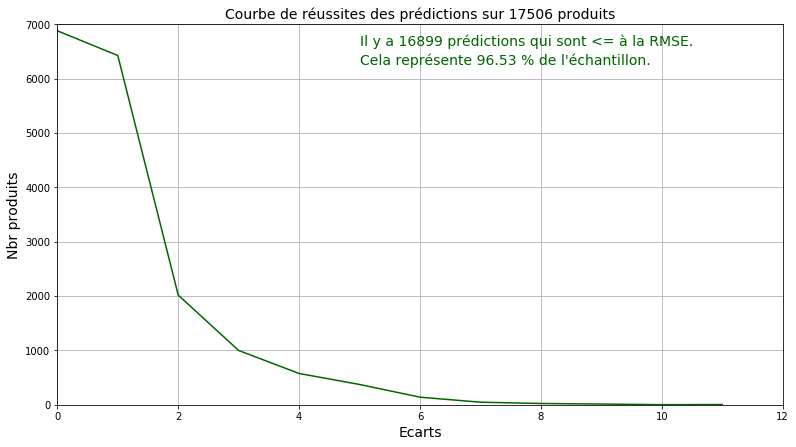

In [31]:
some_data = validation_set.iloc[:]
some_labels = validation_set["nutrition-score-fr_100g"].iloc[:]
some_data.drop("nutrition-score-fr_100g", axis=1, inplace = True)

predictions = forest.predict(some_data)
predictions = map(int,predictions)
etiquettes = list(some_labels)

#print("Prédictions:",predictions)
#print("Etiquettes:",etiquettes)

[juste,ec1,ec2,ec3,ec4,ec5,ec6,ec7,ec8,ec9,ec10,ec11] = [0 for i in range(12)]

for i in enumerate(predictions):

    if (i[1] == etiquettes[i[0]]):
        juste +=1
    elif (i[1] >= (etiquettes[i[0]] - 2)) and (i[1] <= (etiquettes[i[0]] + 2)):
        ec1 +=1
    elif (i[1] >= (etiquettes[i[0]] - 4)) and (i[1] <= (etiquettes[i[0]] + 4)):
        ec2 +=1
    elif (i[1] >= (etiquettes[i[0]] - 6)) and (i[1] <= (etiquettes[i[0]] + 6)):
        ec3 +=1
    elif (i[1] >= (etiquettes[i[0]] - 8)) and (i[1] <= (etiquettes[i[0]] + 8)):
        ec4 +=1
    elif (i[1] >= (etiquettes[i[0]] - 10)) and (i[1] <= (etiquettes[i[0]] + 10)):
        ec5 +=1
    elif (i[1] >= (etiquettes[i[0]] - 12)) and (i[1] <= (etiquettes[i[0]] + 12)):
        ec6 +=1
    elif (i[1] >= (etiquettes[i[0]] - 14)) and (i[1] <= (etiquettes[i[0]] + 14)):
        ec7 +=1
    elif (i[1] >= (etiquettes[i[0]] - 16)) and (i[1] <= (etiquettes[i[0]] + 16)):
        ec8 +=1
    elif (i[1] >= (etiquettes[i[0]] - 18)) and (i[1] <= (etiquettes[i[0]] + 18)):
        ec9 +=1
    elif (i[1] >= (etiquettes[i[0]] - 20)) and (i[1] <= (etiquettes[i[0]] + 20)):
        ec10 +=1
    else:
        ec11 +=1
        
donnees = list([[0,1,2,3,4,5,6,7,8,9,10,11],[juste,ec1,ec2,ec3,ec4,ec5,ec6,ec7,ec8,ec9,ec10,ec11]])
print(donnees) 

# On calcule le pourcentage de prédictions >= 5 Nutriscore :

somme_pred_inf_rmse = 0

condition = 0
for i in donnees[1]:
    
    if condition <= 4:
        somme_pred_inf_rmse = somme_pred_inf_rmse + i
    
    condition += 1
    
percent_inf_rmse = round(((somme_pred_inf_rmse/some_data.shape[0])*100),2)

plt.figure(figsize=[13,7])
# the histogram of the data
plt.plot(donnees[0],donnees[1],color = "darkgreen")


plt.xlabel('Ecarts', size=14)
plt.ylabel('Nbr produits', size=14)
plt.title('Courbe de réussites des prédictions sur {} produits'.format(some_data.shape[0]), size=14)

plt.text(5,6600,"Il y a {} prédictions qui sont <= à la RMSE.".format(somme_pred_inf_rmse), size=14, color="darkgreen")
plt.text(5,6250,"Cela représente {} % de l'échantillon.".format(percent_inf_rmse), size=14, color="darkgreen")

plt.axis([0, 12, 0, 7000])
plt.grid(True)
plt.show()

In [32]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 5),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(forest_reg, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, Y_train)

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\julie\Anaconda\

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [33]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.851 (std: 0.002)
Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 2, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.851 (std: 0.002)
Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 1, 'min_samples_split': 8}

Model with rank: 3
Mean validation score: 0.850 (std: 0.002)
Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 3, 'min_samples_split': 7}



# Détermination du grade nutritionnel

Une fois que notre Nutriscore est trouvé, nous pouvons rechercher son équivalent en lettre (de A à E), le grade nutritionnel.

Pour cela, nous pouvons facilement utiliser l'echelle disponible sur internet (https://quoidansmonassiette.fr/comment-est-calcule-le-nutri-score-logo-nutritionnel/), mais pour l'exercice nous allons utiliser un modèle de prédiction qui s'appelle le kNN (les k plus proches voisins).


In [32]:
#On définit les données pour le kNN
#On recherche le grade nutritionnel en fonction du Nutriscore
data_predict["nutrition_grade_fr"] = data_analyse.loc[:,["nutrition_grade_fr"]]
data_predict.head()

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,nutrition_grade_fr
17,1594.0,22.0,15.5,21.90,4.4,d
25,657.0,0.0,0.0,27.00,3.6,a
57,669.0,2.2,0.5,0.60,1.6,a
242,1255.0,0.0,0.0,66.67,10.0,c
289,450.0,2.2,0.9,0.50,0.5,b


In [33]:
Y = data_predict["nutrition_grade_fr"]
X = data_predict
X.drop("nutrition_grade_fr", axis=1, inplace = True)

In [34]:
#On split les données
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Le modèle ne fonction qu'avec des tableau à 2 dimensions, nous redimensionnons donc les 2 tableaux qui n'en ont qu'une dans notre cas.
#X_train = X_train.reshape(-1, 1)
#X_test = X_test.reshape(-1, 1)

In [35]:
#On construit le modèle
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit the classifier to the data
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
#check accuracy of our model on the test data
from sklearn.metrics import accuracy_score

# predict the response
pred = knn.predict(X_test)

print("Le modèle aura un taux de précision de  ", 100 * accuracy_score(Y_test, pred), "%.")


Le modèle aura un taux de précision de   68.9901889379204 %.


In [39]:
#On teste le modèle
prediction = knn.predict(X_test)

evaluation = pd.DataFrame(Y_test, columns=["Y_test"])
evaluation["Prediction"] = prediction
evaluation["Nutriscore"] = X_test

OK, NOK = 0, 0

erreurs = pd.DataFrame({}, columns = ["Nutriscore","Vrai valeur grade nutritionnel", "Prediction"])

for i in evaluation.itertuples():

    if i[1] == i[2]:
        OK +=1
    else:
        NOK +=1
        erreurs = erreurs.append({"Nutriscore" : i[3], "Vrai valeur grade nutritionnel" : i[1], "Prediction" : i[2]}, ignore_index=True)

#On trace le graphique contenant la part de produits vendus en France
labels = ["OK", "NOK"]
sizes = [OK, NOK]
explode = (0, 0.1)
color = ['#ff9999','#66b3ff']

fig1, ax1 = plt.subplots(figsize=(9, 6))

ax1.pie(sizes, labels=labels,explode=explode, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 12})

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title("Taux de réussite modèle kNN", bbox={'facecolor':'0.8', 'pad':5})
plt.tight_layout()
plt.show()

ValueError: Wrong number of items passed 5, placement implies 1

In [ ]:
print(X_test.shape)
erreurs.head(15)

In [ ]:
#Cherchons à determiner le meilleur k pour notre modèle

# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [ ]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("Le nombre optimal de voisin est {}".format(optimal_k))

# plot misclassification error vs k
plt.figure(figsize=[13,7])
plt.plot(neighbors, mse)
plt.title("Performance k-NN / k", size = 14)
plt.xlabel("Nombre de voisins k", size = 14)
plt.ylabel("Taux d'erreurs", size = 14)
plt.show()

In [36]:
# Fixer les valeurs des hyperparamètres à tester
from sklearn import model_selection
from sklearn import neighbors, metrics


param_grid = {'n_neighbors':[1,3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), # un classifieur kNN
param_grid, # hyperparamètres à tester
cv=5, # nombre de folds de validation croisée
scoring=score # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
# clf.fit(X_train, y_train)
clf.fit(X_train, Y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:", clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(clf.cv_results_['mean_test_score'], # score moyen
clf.cv_results_['std_test_score'], # écart-type du score
clf.cv_results_['params'] # valeur de l'hyperparamètre
):
    print("\t%s = %0.3f (+/-%0.03f) for %r" % (score, # critère utilisé
    mean, # score moyen
    std * 2, # barre d'erreur
    params # hyperparamètre
    ))

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 1}
Résultats de la validation croisée :
	accuracy = 0.676 (+/-0.005) for {'n_neighbors': 1}
	accuracy = 0.671 (+/-0.007) for {'n_neighbors': 3}
	accuracy = 0.674 (+/-0.005) for {'n_neighbors': 5}
	accuracy = 0.673 (+/-0.002) for {'n_neighbors': 7}
	accuracy = 0.670 (+/-0.002) for {'n_neighbors': 9}
	accuracy = 0.667 (+/-0.001) for {'n_neighbors': 11}
	accuracy = 0.663 (+/-0.003) for {'n_neighbors': 13}
	accuracy = 0.660 (+/-0.004) for {'n_neighbors': 15}


Sur le jeu de test, nous obtenons une précision de : 69.7 %


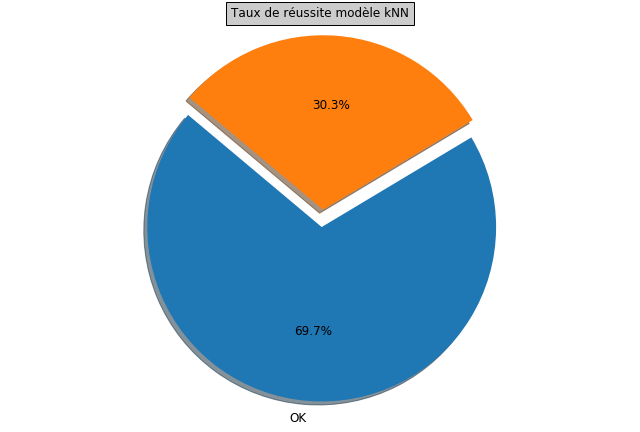

In [37]:
#Testons notre set de validation
y_pred = clf.predict(X_test)
print("Sur le jeu de test, nous obtenons une précision de :", round(100 * metrics.accuracy_score(Y_test, y_pred),2), "%")

df_prediction = pd.DataFrame(y_pred, columns=["Prédictions"])
df_prediction["Vrai valeur"] = Y_test.values

OK, NOK = 0, 0

erreurs = pd.DataFrame({}, columns = ["Vrai valeur grade nutritionnel", "Prediction"])

for i in df_prediction.itertuples():

    if i[1] == i[2]:
        OK +=1
    else:
        NOK +=1
        erreurs = erreurs.append({"Vrai valeur grade nutritionnel" : i[2], "Prediction" : i[1]}, ignore_index=True)

#On trace le graphique contenant la part de produits vendus en France
labels = ["OK", "NOK"]
sizes = [OK, NOK]
explode = (0, 0.1)
color = ['#ff9999','#66b3ff']

fig1, ax1 = plt.subplots(figsize=(9, 6))

ax1.pie(sizes, labels=labels,explode=explode, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 12})

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title("Taux de réussite modèle kNN", bbox={'facecolor':'0.8', 'pad':5})
plt.tight_layout()
plt.show()

# ESSAI DES MODELES SANS UTILISER DE SET DE VALIDATION

### Il y a donc plus de données d'entraînements

### 1- Régression linéaire

La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 5.041006085804244
Cela veut dire que pour une prédiction, notre modèle se trompera de 5.04 sur le Nutriscore.
Le score R2 est 0.5839258281132389


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 5.023692163078176
Cela veut dire que pour une prédiction, notre modèle se trompera de 5.02 sur le Nutriscore.
Le score R2 est 0.584022931883899


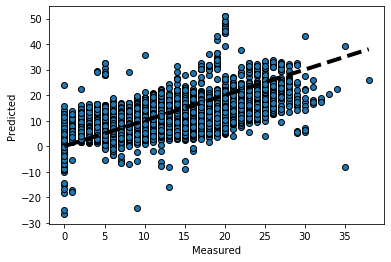

In [42]:
# Evaluation du training set

from sklearn.metrics import r2_score

y_train_predict = lmodellineaire.predict(X_train2)
rmse = (np.sqrt(mean_squared_error(Y_train2, y_train_predict)))
r2 = r2_score(Y_train2, y_train_predict)

print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(rmse))
print("Cela veut dire que pour une prédiction, notre modèle se trompera de",round(rmse,2),"sur le Nutriscore.")
print('Le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test2)
rmse = (np.sqrt(mean_squared_error(Y_test2, y_test_predict)))
r2 = r2_score(Y_test2, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(rmse))
print("Cela veut dire que pour une prédiction, notre modèle se trompera de",round(rmse,2),"sur le Nutriscore.")
print('Le score R2 est {}'.format(r2))

# Plot outputs
fig, ax = plt.subplots()
ax.scatter(Y_test2, y_test_predict, edgecolors=(0, 0, 0))
ax.plot([Y_test2.min(), Y_test2.max()], [Y_test2.min(), Y_test2.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [43]:
lin_scores = cross_val_score(lmodellineaire, X_train2, Y_train2, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

print("Evaluation par validation croisée :")
print("Score :", lin_rmse_scores)
print("RMSE :", lin_rmse_scores.mean())
print("Ecart-type :", lin_rmse_scores.std())


Evaluation par validation croisée :
Score : [5.03293992 5.05191346 5.01076759 5.13813337 5.08722154 4.97048862
 5.0288822  5.03786081 5.02501172 5.03761852]
RMSE : 5.04208377498554
Ecart-type : 0.04248912028914618


### 2- DecisionTreeRegressor

In [44]:
from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor()
treereg.fit(X_train2, Y_train2)

y_train_predict_tree_reg = treereg.predict(X_train2)
rmse = (np.sqrt(mean_squared_error(Y_train2, y_train_predict_tree_reg)))
r2 = r2_score(Y_train2, y_train_predict_tree_reg)

print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(rmse))
print("Cela veut dire que pour une prédiction, notre modèle se trompera de",round(rmse,2),"sur le Nutriscore.")
print('Le score R2 est {}'.format(r2))
print('\n')

# model evaluation for testing set
y_test_predict_tree_reg = treereg.predict(X_test2)
rmse = (np.sqrt(mean_squared_error(Y_test2, y_test_predict_tree_reg)))
r2 = r2_score(Y_test2, y_test_predict_tree_reg)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(rmse))
print("Cela veut dire que pour une prédiction, notre modèle se trompera de",round(rmse,2),"sur le Nutriscore.")
print('Le score R2 est {}'.format(r2))

La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 0.8217459356113195
Cela veut dire que pour une prédiction, notre modèle se trompera de 0.82 sur le Nutriscore.
Le score R2 est 0.9889436585247139


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 3.846886388243304
Cela veut dire que pour une prédiction, notre modèle se trompera de 3.85 sur le Nutriscore.
Le score R2 est 0.7560829990126037


In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(treereg, X_train2, Y_train2, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

print("Evaluation par validation croisée :")
print("Score :", tree_rmse_scores)
print("RMSE :", tree_rmse_scores.mean())
print("Ecart-type :", tree_rmse_scores.std())


Evaluation par validation croisée :
Score : [3.7491272  3.85077887 3.82203615 3.78973726 3.8741339  3.95456605
 3.87566943 3.85835002 3.85042168 3.70773207]
RMSE : 3.8332552627855327
Ecart-type : 0.06653655320266613


### 3- RandomForestRegressor

In [46]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train2, Y_train2)

y_train_predict_forest = forest.predict(X_train2)
rmse = (np.sqrt(mean_squared_error(Y_train2, y_train_predict_forest)))
r2 = r2_score(Y_train2, y_train_predict_forest)

print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(rmse))
print("Cela veut dire que pour une prédiction, notre modèle se trompera de",round(rmse,2),"sur le Nutriscore.")
print('Le score R2 est {}'.format(r2))
print('\n')

# model evaluation for testing set
y_test_predict_forest = forest.predict(X_test2)
rmse = (np.sqrt(mean_squared_error(Y_test2, y_test_predict_forest)))
r2 = r2_score(Y_test2, y_test_predict_forest)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(rmse))
print("Cela veut dire que pour une prédiction, notre modèle se trompera de",round(rmse,2),"sur le Nutriscore.")
print('Le score R2 est {}'.format(r2))

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 1.4462741149671892
Cela veut dire que pour une prédiction, notre modèle se trompera de 1.45 sur le Nutriscore.
Le score R2 est 0.9657518165791825


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 3.0861479376005843
Cela veut dire que pour une prédiction, notre modèle se trompera de 3.09 sur le Nutriscore.
Le score R2 est 0.8430154789927369


In [47]:
forest_scores = cross_val_score(forest, X_train2, Y_train2, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

print("Evaluation par validation croisée :")
print("Score :", forest_rmse_scores)
print("RMSE :", forest_rmse_scores.mean())
print("Ecart-type :", forest_rmse_scores.std())


Evaluation par validation croisée :
Score : [2.9452451  3.05376959 3.01701087 2.97404169 3.13850514 3.05772015
 3.07163317 3.0721838  3.05243193 2.99028187]
RMSE : 3.0372823315761712
Ecart-type : 0.05352886917896766


In [40]:
data_knn.head()

knn = KNeighborsClassifier(2)


knn.fit(data_knn["nutrition-score-fr_100g"].values.reshape(-1, 1), data_knn["nutrition_grade_fr"].values.reshape(-1, 1))

data_knn["Prediction"] = knn.predict(data_knn["nutrition-score-fr_100g"].values.reshape(-1, 1))

data_knn["error"] = data_knn["nutrition_grade_fr"] != data_knn["Prediction"]


C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [41]:
data_knn["error"].sum()

26442

In [42]:
data_knn.shape

(255262, 4)

In [69]:
from sklearn.model_selection import cross_val_score

linreg_score = cross_val_score(modeleReg, X, Y, scoring="neg_mean_squared_error", cv=10)
linreg_rmse = np.sqrt(-linreg_score)

print(linreg_rmse)
print("Moyenne", linreg_rmse.mean())
print("Ecart-type", linreg_rmse.std())

NameError: name 'modeleReg' is not defined

In [133]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
results = regr.fit(X, Y)
#regr.predict(data_sample)

print(results.intercept_, results.coef_)


[5.48104709e+02 1.51298848e-01 4.65921893e+00] [[53.74763046]
 [ 0.53529051]
 [ 0.83957511]]


In [134]:
from sklearn.metrics import mean_squared_error

print("Le coefficient R² est de : ", results.score(X,Y))
print("Le RMSE est de : ", mean_squared_error(Y, regr.predict(X)))

Le coefficient R² est de :  0.4165582063348169
Le RMSE est de :  100958.03225426293


C:\Anaconda3\envs\Projet 3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


ValueError: could not broadcast input array from shape (3,3) into shape (3)

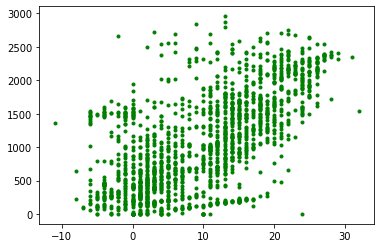

In [135]:
plt.plot(data_sample_nettoye['nutrition-score-fr_100g'], data_sample_nettoye['energy_100g'], 'ro', markersize=3, color='green')

# On affiche la droite entre -15 et 40
plt.plot([-15,40], [results.intercept_,results.intercept_ + 40 * results.coef_], linestyle='--', c='#000000')

plt.show()

In [140]:
results.intercept_ + results.coef_ * 20

array([[1623.0573178 , 1075.10390812, 1079.61182821],
       [ 558.81051863,   10.85710896,   15.36502904],
       [ 564.89621076,   16.94280109,   21.45072118]])

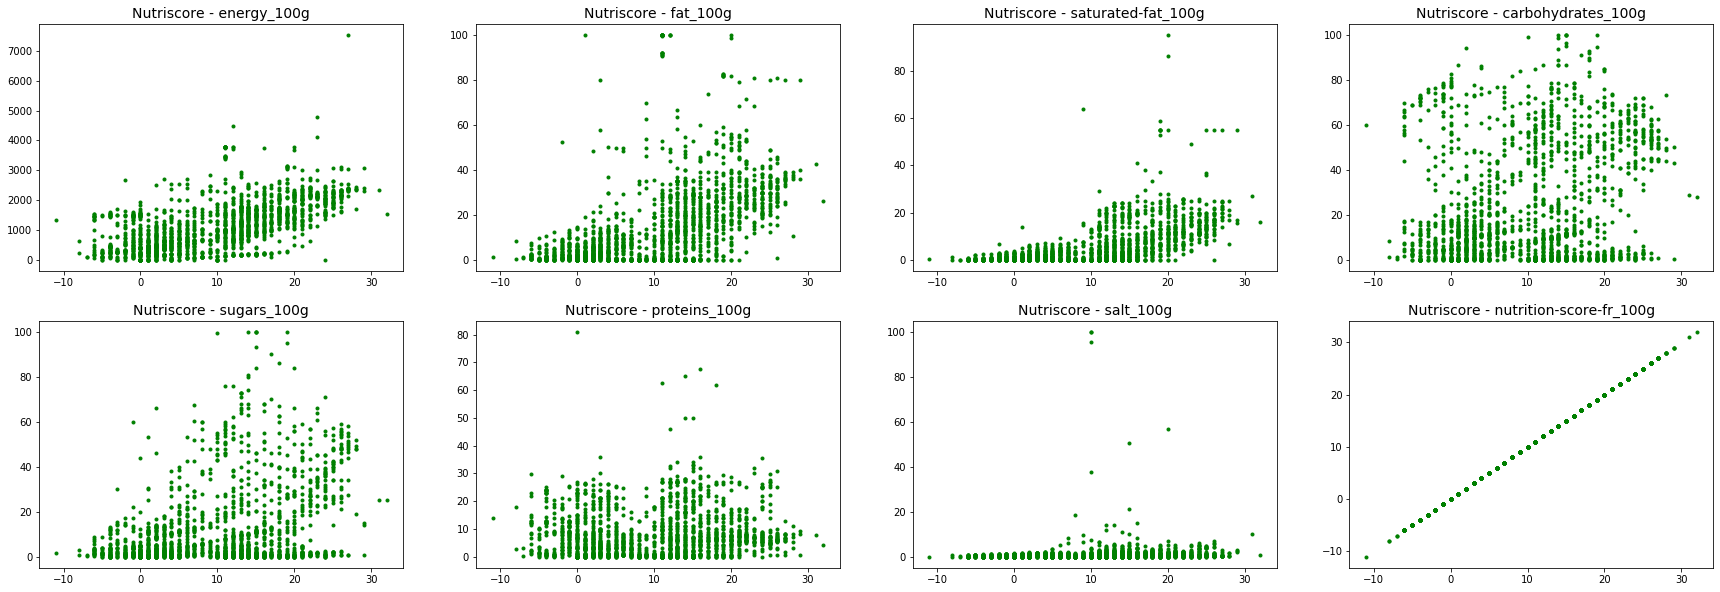

In [139]:
nbr_lignes = 2
nbr_colonnes = 4
num_graph = 1

plt.subplots(figsize=(30, 10))

for i in data_sample:
    
        #On code une condition pour ne traiter que les indicateurs désirés
        if num_graph <= nbr_lignes * nbr_colonnes:

            mydata = data_sample
            mydata.dropna(subset=[i], axis=0, inplace=True, how='any')

            plt.subplot(nbr_lignes,nbr_colonnes, num_graph)
            data_sample[i].dropna(axis=0,inplace=True)
            plt.plot(mydata['nutrition-score-fr_100g'], mydata[i], 'ro', markersize=3, color='green')
            plt.title("Nutriscore - " + i, size=14)
            plt.xlabel('')

            num_graph +=1

plt.show()
#plt.savefig('Analyse univariée.pdf')

ConversionError: Failed to convert value(s) to axis units: array(['c', 'c', 'd', 'a', 'e', 'a', 'a', 'a', 'c', 'a', 'a', 'b', 'c',
       'c', 'd', 'c', 'd', 'e', 'e', 'd', 'a', 'a', 'c', 'e', 'e', 'c',
       'a', 'd', 'd', 'e', 'd', 'b', 'a', 'd', 'd', 'e', 'a', 'd', 'c',
       'e', 'a', 'b', 'e', 'd', 'd', 'a', 'e', 'b', 'e', 'e', 'a', 'a',
       'c', 'a', 'd', 'c', 'a', 'a', 'b', 'e', 'e', 'd', 'e', 'c', 'e',
       'c', 'a', 'e', 'a', 'd', 'e', 'b', 'e', 'b', 'a', 'e', 'a', 'b',
       'b', 'c', 'b', 'c', 'c', 'c', 'a', 'd', 'a', 'e', 'c', 'e', 'b',
       'c', 'a', 'a', 'c', 'b', 'b', 'b', 'c', 'c', 'e', 'c', 'c', 'a',
       'd', 'e', 'e', 'c', 'e', 'd', 'c', 'd', 'e', 'c', 'a', 'd', 'e',
       'd', 'a', 'd', 'e', 'd', 'b', 'a', 'c', 'e', 'a', 'b', 'c', 'e',
       'e', 'e', 'd', 'a', 'b', 'a', 'a', 'd', 'b', 'c', 'e', 'd', 'b',
       'e', 'a', 'd', 'd', 'c', 'b', 'e', 'd', 'd', 'd', 'd', 'a', 'a',
       'b', 'a', 'd', 'd', 'a', 'e', 'd', 'e', 'd', 'c', 'a', 'e', 'a',
       'c', 'c', 'c', 'b', 'c', 'a', 'd', 'a', 'c', 'd', 'a', 'd', 'd',
       'e', 'd', 'e', 'd', 'c', 'e', 'b', 'c', 'a', 'e', 'd', 'a', 'e',
       'd', 'a', 'a', 'd', 'd', 'a', 'e', 'a', 'a', 'c', 'd', 'a', 'a',
       'e', 'a', 'd', 'd', 'a', 'a', 'd', 'a', 'b', 'b', 'e', 'b', 'd',
       'a', 'c', 'd', 'c', 'a', 'c', 'b', 'c', 'a', 'b', 'e', 'e', 'd',
       'd', 'e', 'a', 'c', 'e', 'd', 'c', 'b', 'c', 'c', 'b', 'e', 'c',
       'e', 'b', 'e', 'a', 'b', 'c', 'e', 'd', 'd', 'c', 'd', 'd', 'b',
       'e', 'd', 'b', 'b', 'e', 'd', 'b', 'b', 'd', 'd', 'c', 'c', 'b',
       'c', 'c', 'd', 'a', 'e', 'e', 'e', 'c', 'b', 'b', 'c', 'b', 'b',
       'a', 'd', 'b', 'e', 'b', 'e', 'b', 'a', 'e', 'b', 'b', 'c', 'd',
       'e', 'c', 'd', 'b', 'd', 'd', 'a', 'e', 'd', 'a', 'd', 'b', 'a',
       'c', 'e', 'c', 'a', 'b', 'd', 'b', 'a', 'c', 'a', 'b', 'b', 'c',
       'd', 'c', 'b', 'a', 'd', 'd', 'a', 'b', 'c', 'e', 'b', 'a', 'd',
       'a', 'a', 'd', 'd', 'e', 'a', 'd', 'c', 'b', 'c', 'b', 'd', 'c',
       'c', 'd', 'e', 'a', 'a', 'b', 'd', 'a', 'b', 'a', 'd', 'b', 'e',
       'a', 'c', 'c', 'b', 'd', 'b', 'a', 'b', 'c', 'a', 'b', 'd', 'b',
       'e', 'c', 'c', 'c', 'c', 'a', 'a', 'b', 'c', 'd', 'e', 'd', 'd',
       'e', 'c', 'c', 'a', 'a', 'a', 'e', 'c', 'd', 'd', 'e', 'e', 'c',
       'd', 'b', 'b', 'd', 'c', 'a', 'b', 'b', 'c', 'e', 'b', 'e', 'e',
       'b', 'a', 'c', 'c', 'c', 'd', 'd', 'e', 'e', 'e', 'c', 'c', 'a',
       'c', 'c', 'b', 'b', 'a', 'c', 'd', 'a', 'b', 'c', 'a', 'a', 'a',
       'd', 'b', 'a', 'a', 'c', 'e', 'a', 'd', 'c', 'a', 'd', 'd', 'c',
       'c', 'd', 'e', 'a', 'c', 'e', 'd', 'd', 'e', 'a', 'e', 'e', 'e',
       'a', 'a', 'a', 'd', 'd', 'e', 'e', 'd', 'd', 'c', 'a', 'b', 'a',
       'e', 'c', 'c', 'a', 'd', 'a', 'a', 'd', 'a', 'c', 'c', 'a', 'c',
       'd', 'b', 'a', 'a', 'b', 'c', 'a', 'a', 'a', 'e', 'd', 'c', 'd',
       'c', 'c', 'a', 'a', 'e', 'e', 'd', 'a', 'c', 'c', 'd', 'a', 'c',
       'c', 'e', 'c', 'b', 'd', 'd', 'e', 'e', 'd', 'b', 'b', 'd', 'd',
       'd', 'c', 'd', 'b', 'a', 'e', 'e', 'd', 'd', 'b', 'd', 'c', 'd',
       'e', 'c', 'd', 'b', 'c', 'b', 'd', 'e', 'b', 'd', 'c', 'b', 'a',
       'e', 'a', 'c', 'c', 'b', 'd', 'b', 'd', 'e', 'b', 'c', 'b', 'c',
       'c', 'e', 'e', 'b', 'c', 'b', 'c', 'd', 'c', 'd', 'c', 'd', 'b',
       'e', 'e', 'c', 'c', 'a', 'e', 'a', 'd', 'b', 'b', 'c', 'd', 'b',
       'd', 'c', 'b', 'a', 'd', 'd', 'e', 'd', 'a', 'd', 'e', 'b', 'a',
       'c', 'a', 'd', 'd', 'd', 'c', 'a', 'c', 'd', 'c', 'b', 'd', 'a',
       'c', 'd', 'd', 'd', 'e', 'c', 'b', 'c', 'd', 'd', 'a', 'd', 'c',
       'd', 'b', 'd', 'd', 'e', 'a', 'c', 'e', 'b', 'd'], dtype=object)

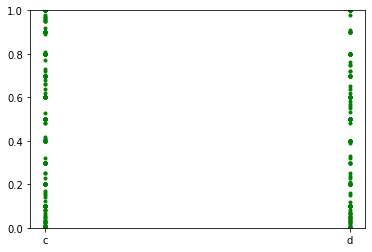

In [62]:
plt.plot(data_sample['nutrition_grade_fr'], data_sample, 'ro', markersize=3, color='green')

# ANALYSE UNIVARIEE

Notre application se concentrant sur le NutriScore des aliments. Nous allons analyser deux variables (indicateurs) :

### 1- 'nutrition-score-fr_100g'

## Etude taux de remplissage des données

In [110]:
#Créons le dataframe avec les scores disponibles
nutriscore = data['nutrition-score-fr_100g'] 
nutriscore = nutriscore.dropna()

donnees_totales = nutriscore.shape[0]
donnees_nulles = nutriscore.isnull().sum().sum()

taux_remplissage = (donnees_nulles / donnees_totales) * 100
taux_remplissage

0.0

## Calcul des mesures

In [70]:
#Nous allons calculer les 3 mesures à tendance centrale

#Le mode :
mode_nutriscore = nutriscore.mode()

#La moyenne :
mean_nutriscore = nutriscore.mean()

#La médiane :
med_nutriscore = nutriscore.median()

#Nous allons calculer les mesures de dispersion :

#La variance empirique :
var_nutriscore = nutriscore.var()

#L'écart-type :
std_nutriscore = nutriscore.std()

#Nous allons calculer les mesures de forme :

#Le Skewness empirique
skew_nutriscore = nutriscore.skew()

#Le Kurtosis empirique
kurt_nutriscore = nutriscore.kurtosis()


print("Notre échantillon contient :", nutriscore.shape[0], " produits soumis au NutriScore.")
print('')
print("Le mode de l'échantillon est égal à :", mode_nutriscore[0])
print('')
print("La moyenne de l'échantillon est égale à : ", mean_nutriscore)
print('')
print("La médiane de l'échantillon est égale à : ", med_nutriscore)
print('')
print("La variance empirique de l'échantillon est égale à : ", var_nutriscore)
print('')
print("L'écart-type de l'échantillon est égal à : ", std_nutriscore)
print('')
print("Le skewness empirique de l'échantillon est égal à : ", skew_nutriscore)
print('')
print("Le Kurtosis empirique de l'échantillon est égal à : ", kurt_nutriscore)

Notre échantillon contient : 197217  produits soumis au NutriScore.

Le mode de l'échantillon est égal à : 11.0

La moyenne de l'échantillon est égale à :  9.690782234797203

La médiane de l'échantillon est égale à :  11.0

La variance empirique de l'échantillon est égale à :  76.43212504576019

L'écart-type de l'échantillon est égal à :  8.742546828342425

Le skewness empirique de l'échantillon est égal à :  0.08221181119189505

Le Kurtosis empirique de l'échantillon est égal à :  -0.9288671027549724


## Analyse graphique

In [111]:
#Fonction permettant de faire une analyse graphique d'un indicateur
#Elle comporte une figure avec 3 graphiques explicatifs
#Un histogramme
#Une boite à moustache
#Un QQ Plot

def tracer_graphiques(donnees, title_g1, xlab_g1, ylab_g1, title_g2, xlab_g2):
    
    plt.subplots(figsize=(20, 25))

    plt.subplot(311)
    plt.hist(donnees, bins=30, color="lightgreen")
    plt.axvline(donnees.mean(), ls='--', color='darkviolet')
    plt.axvline(round(np.percentile(donnees, 5)), ls='--', color='brown')
    plt.axvline(round(np.percentile(donnees, 25)), ls='--', color='brown')
    plt.axvline(round(np.percentile(donnees, 75)), ls='--', color='brown')
    plt.axvline(round(np.percentile(donnees, 95)), ls='--', color='brown')
    plt.title(title_g1,size=18)
    plt.ylabel(xlab_g1,size=14)
    plt.xlabel(ylab_g1,size=14)
    plt.grid()

    plt.subplot(312)
    plt.boxplot(donnees,whis=[5,95], meanline=True, showmeans=True, vert=False)
    plt.grid()
    plt.title(title_g2,size=18)
    plt.xlabel(xlab_g2,size=14)

    plt.subplot(313)

    import scipy.stats as stats
    measurements = donnees.as_matrix()
    stats.probplot(measurements, dist="norm", plot=plt)
    plt.show()

C:\Anaconda3\envs\Projet 3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


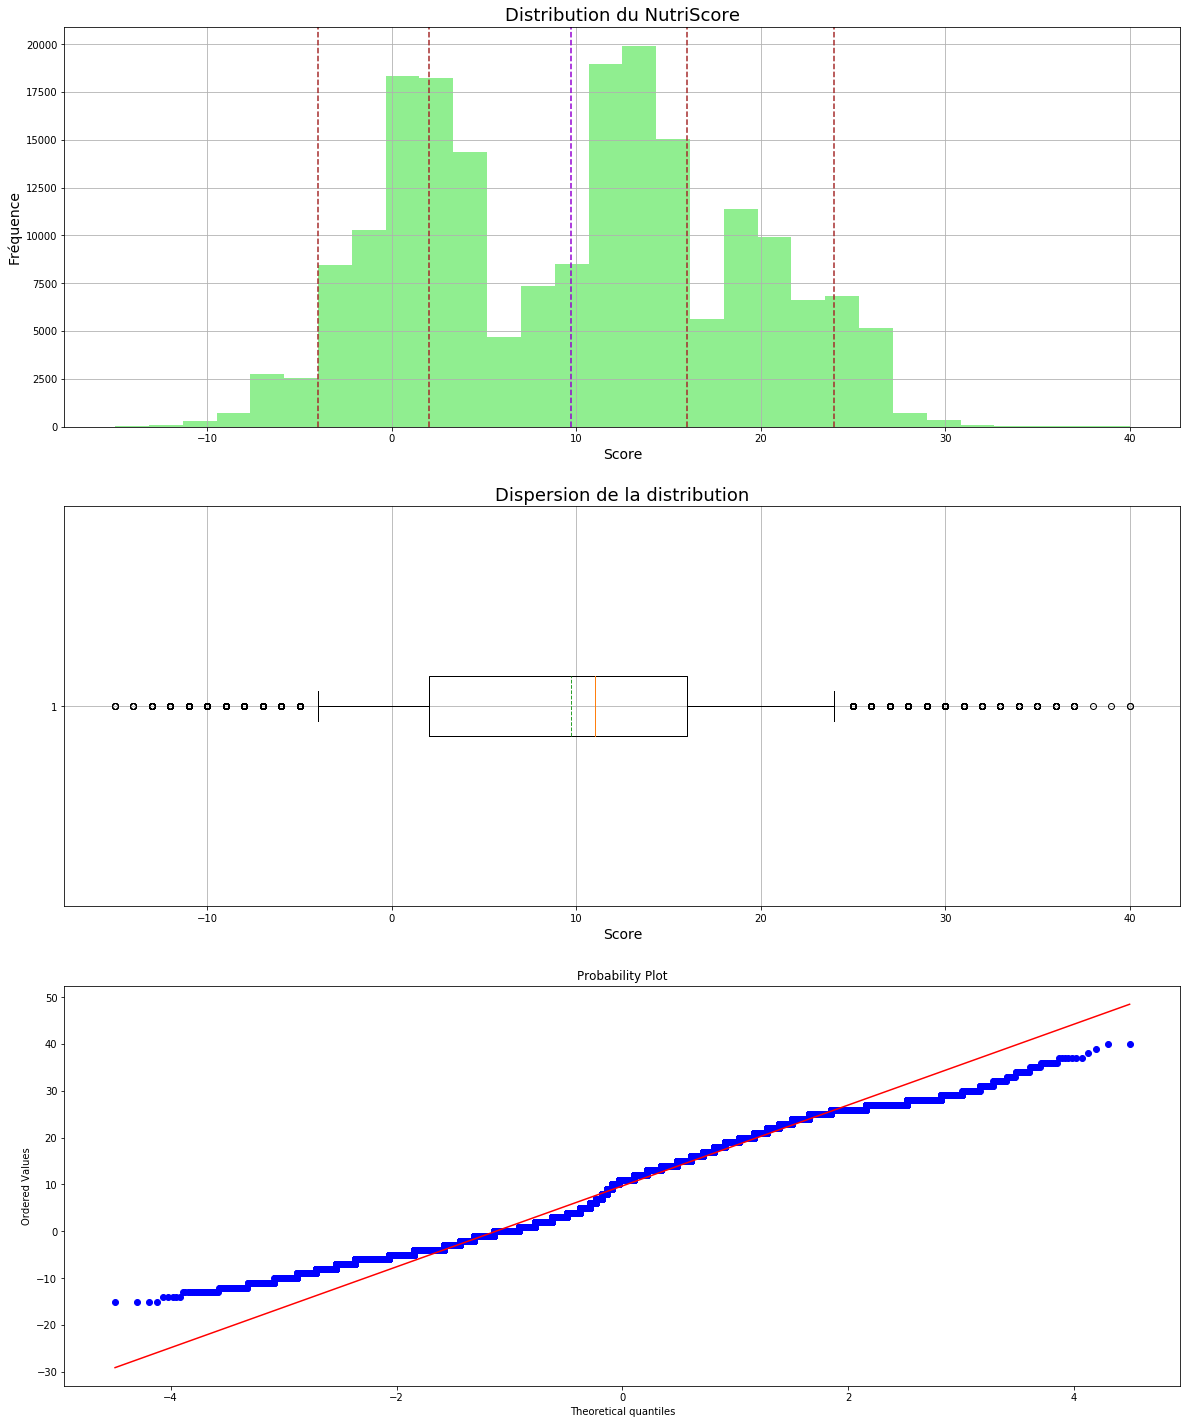

In [112]:
tracer_graphiques(nutriscore, 'Distribution du NutriScore', 'Fréquence', 'Score', 'Dispersion de la distribution', 'Score')

## Explications :

### - Le premier graphique représente la distribution de notre indicateur :
Nous pouvons voir que cette distribution tend visuellement vers une distribution normale (Gaussienne), centrée sur la moyenne comme nous le montre la valeur du Skewness (0.08).

En étudiant le Kurtosis (qui est une mesure de forme) avec une valeur de -0.92, nous constatons que l'histogramme est 'applati' par rapport à une distribution normale. Cela veut dire que la distribution n'est pas très concentrée autour de la moyenne.


### - Le second graphique représente la dispersion de la distrubution :
La boîte à moustache est configurée de telle sorte que la limite mini représente 5% de la population, et la limite maxi représente 95% de la population.

Ici 5% de la population a un NutriScore inférieur à 2, et 5% de la population a un Nutriscore supérieur à 24.

Nous pouvons aussi constater la symétrie de la boite à moustache par rapport à la moyenne de la population (Ligne verte sur le graphique).

### - Le troisième graphique est un QQ Plot :
Ce graphique permet, à partir d'un échantillon (ici 1000 produits), de vérifier si la distribution est normale. Plus les points sont proches de la droite, plus la distribution est dite normale. 

Ici, nous pouvons constater que la distribution est bien normale.


### 2- 'nova_group'
Le groupe NOVA est une classification des aliments. Plus précisément une répartition des aliments en quatre groupes en fonction du degré de transformation des matières dont ils sont constitués.

In [108]:
data_nova = data['nova_group']
data_nova.describe()

count    161150.000000
mean          3.505182
std           0.877696
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           4.000000
Name: nova_group, dtype: float64

C:\Anaconda3\envs\Projet 3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\envs\Projet 3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Anaconda3\envs\Projet 3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Anaconda3\envs\Projet 3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Anaconda3\envs\Projet 3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Anaconda3\envs\Projet 3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Anaconda3\envs\Projet 3\li

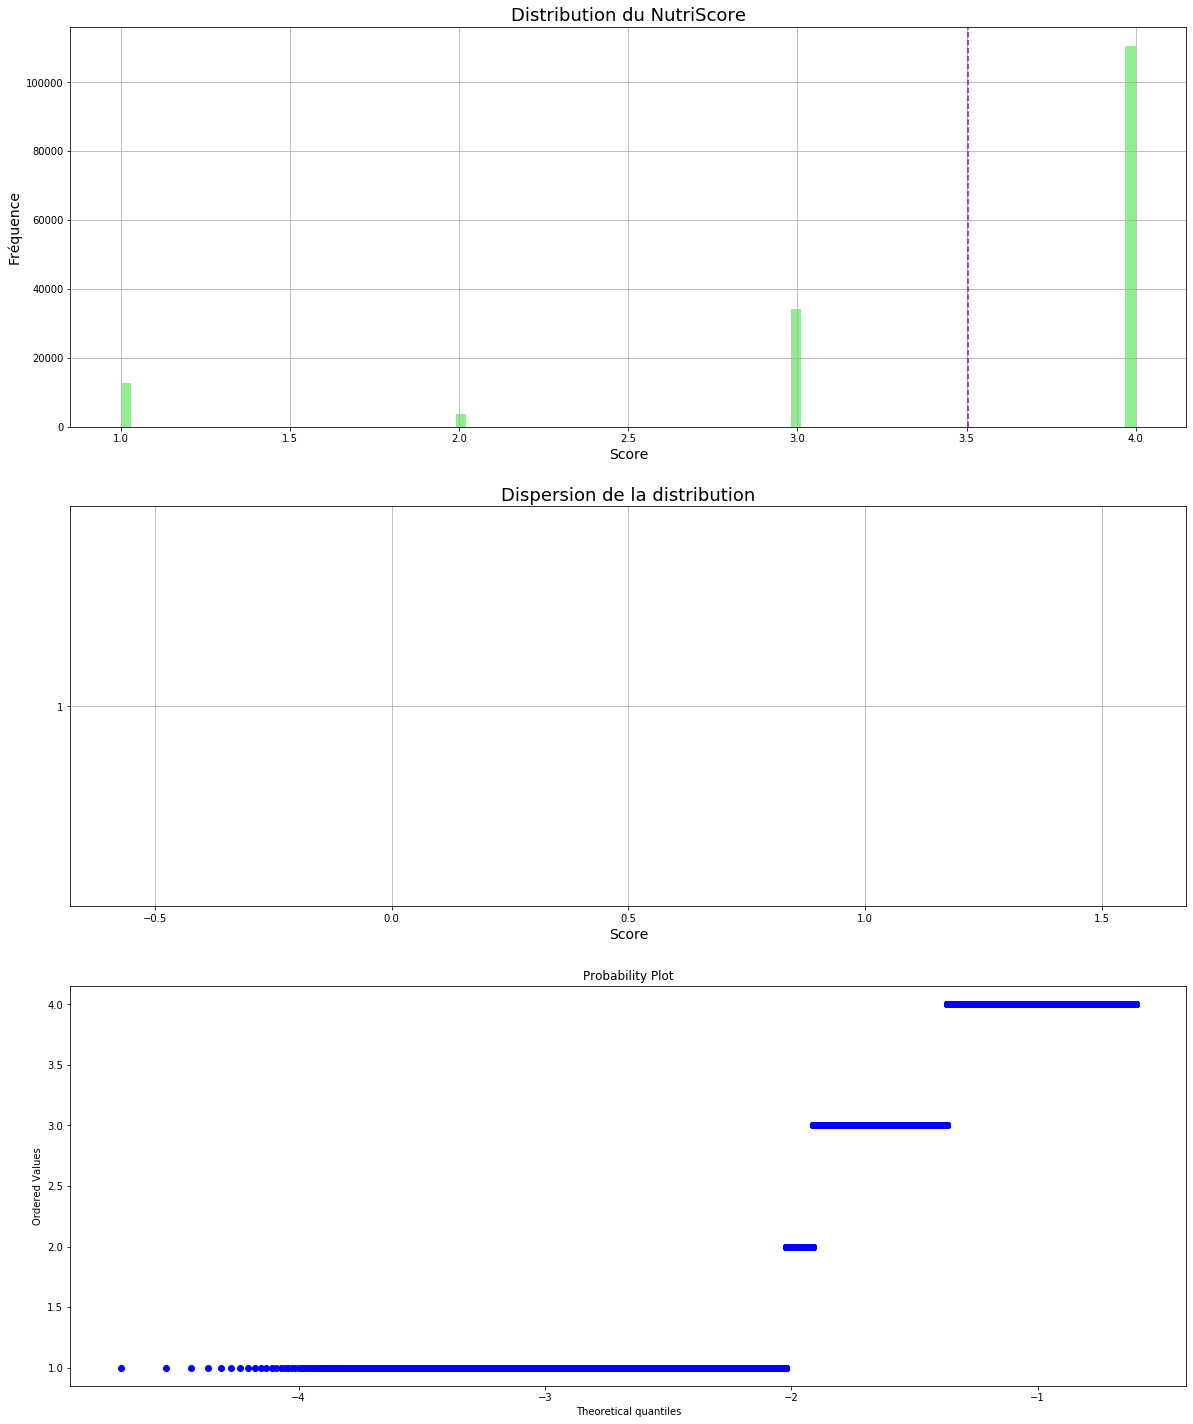

In [109]:
tracer_graphiques(data_nova, 'Distribution du NutriScore', 'Fréquence', 'Score', 'Dispersion de la distribution', 'Score')